In [1]:
library(ggplot2)
library(dplyr)
library(ggExtra) 
library(gplots)
library(reshape2)
library(umap)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




ERROR: Error in library(umap): there is no package called ‘umap’


In [2]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
variant_list <- read.table("../variant_annotation/780_variant_annotation.csv",header=T,sep=",")

In [3]:
head(variant_list)

X             variant_list  sample_number_presented HEART ADRENAL CB CTX
1 1-1196724-A-T 1-1196724-A-T 1                       0     0       0  0  
2 1-4450513-G-A 1-4450513-G-A 1                       0     0       0  0  
3 1-4465349-T-G 1-4465349-T-G 1                       0     0       0  0  
4 1-9049289-T-C 1-9049289-T-C 1                       0     0       1  0  
5 1-9516326-C-T 1-9516326-C-T 1                       0     0       0  0  
6 1-9672930-G-A 1-9672930-G-A 2                       0     1       0  0  
  LIVER KIDNEY POA ⋯ CTX_BG_only BG_only THAL_only Left_only Right_only IN_only
1 0     0      0   ⋯ 1           1       0         0         1          0      
2 0     0      0   ⋯ 0           0       1         0         1          0      
3 0     0      0   ⋯ 0           0       1         1         0          0      
4 0     0      0   ⋯ 0           0       0         0         1          0      
5 0     0      0   ⋯ 1           1       0         1         0          0      
6 1     0      0   ⋯ 0           0       0         0         0          0      
  COUP_only TBR_only TBR_BR DLX_BR
1 0         0        0      0     
2 0         0        0      0     
3 0         0        0      0     
4 0         0        0      0     
5 0         0        0      0     
6 0         0        0      0

In [4]:
head(filtered)

ID             CHROM POS     REF ALT CHROM.POS.REF.ALT ANNO      
1 7669_AO_1_Bulk 1     1196724 A   T   1-1196724-A-T     intronic  
2 7669_AO_1_Bulk 1     2878285 C   T   1-2878285-C-T     intergenic
3 7669_AO_1_Bulk 1     3182127 G   A   1-3182127-G-A     intronic  
4 7669_AO_1_Bulk 1     4450513 G   A   1-4450513-G-A     intergenic
5 7669_AO_1_Bulk 1     4465349 T   G   1-4465349-T-G     intergenic
6 7669_AO_1_Bulk 1     5764433 A   G   1-5764433-A-G     intergenic
  GENE                                         GNOMAD_FREQ REPEAT_MASKER ⋯
1 UBE2J2                                       0.000e+00   0             ⋯
2 TTC34(dist=172055),ACTRT2(dist=59761)        3.230e-05   0             ⋯
3 PRDM16                                       0.000e+00   0             ⋯
4 LINC01346(dist=437870),LINC01777(dist=21598) 9.691e-05   0             ⋯
5 LINC01346(dist=452706),LINC01777(dist=6762)  0.000e+00   0             ⋯
6 MIR4417(dist=140230),MIR4689(dist=158299)    0.000e+00   0             ⋯
  Mosaic_shared_btw_WGS_Amp Hemisphere Region Punch Cell_Type Location AntPost
1 1                         M          AO     1     Bulk      NA       NA     
2 0                         M          AO     1     Bulk      NA       NA     
3 0                         M          AO     1     Bulk      NA       NA     
4 1                         M          AO     1     Bulk      NA       NA     
5 1                         M          AO     1     Bulk      NA       NA     
6 0                         M          AO     1     Bulk      NA       NA     
  DorVen Organ Note
1 NA     HEART NA  
2 NA     HEART NA  
3 NA     HEART NA  
4 NA     HEART NA  
5 NA     HEART NA  
6 NA     HEART NA

In [5]:
names(filtered)

[1] "ID"                        "CHROM"                    
 [3] "POS"                       "REF"                      
 [5] "ALT"                       "CHROM.POS.REF.ALT"        
 [7] "ANNO"                      "GENE"                     
 [9] "GNOMAD_FREQ"               "REPEAT_MASKER"            
[11] "SEGDUP"                    "HOMOPOLYMER"              
[13] "REF_SEQ"                   "DINUCLEOTIDE"             
[15] "NEAR_INDEL"                "UCSC_RPMSK"               
[17] "REF_COUNT"                 "ALT_COUNT"                
[19] "MAF"                       "LOWER_CI"                 
[21] "UPPER_CI"                  "CI_IS_GREATER"            
[23] "NORMAL_REF_COUNT"          "NORMAL_ALT_COUNT"         
[25] "NORMAL_MAF"                "NORMAL_LOWER_CI"          
[27] "NORMAL_UPPER_CI"           "NORMAL_CI_IS_GREATER"     
[29] "Mosaic"                    "Mosaic_shared_btw_WGS_Amp"
[31] "Hemisphere"                "Region"                   
[33] "Punch"                     "Cell_Type"                
[35] "Location"                  "AntPost"                  
[37] "DorVen"                    "Organ"                    
[39] "Note"

In [6]:
unique(filtered$Hemisphere)
unique(filtered$Region)
unique(filtered$Punch)
unique(filtered$Cell_Type)
unique(filtered$Location)
unique(filtered$Organ)
unique(filtered$Note)

[1] "M" "L" "R" NA

[1] "AO"      "LA10"    "Adrenal" "Cb"      "CC"      "EC"      "F"      
 [8] "I"       "Liver"   "Kidney"  "mO"      "O"       "P"       "POA"    
[15] "Cau"     "Put"     "GP"      "Thal"    "Hip"     "Skin"    "T"      
[22] "LV15"    "RA9"     "kidney"  "Olf"     "RV10"    NA

[1] "1"    "2"    ""     "sec1" "sec2" "sec3" "10"   "11"   "3"    "4"   
[11] "5"    "6"    "7"    "8"    "9"    "12"   "13"   "14"   "15"   "16"  
[21] "17"   NA

[1] "Bulk"    "COUPTF2" "DLX1"    "TBR1"    "NeuN"

[1] NA        "A"       "P"       "C"       "FAR_V"   "FAR_D"   "NEAR_A" 
 [8] "NEAR_P"  "NEAR_D"  "NEAR_V"  "NEAR_AV" "NEAR_AD" "NEAR_PV" "NEAR_PD"
[15] "FAR_AD"  "FAR_A"   "FAR_AV"  "FAR_P"   "FAR_PD"  "FAR_PV"

[1] "HEART"   "ADRENAL" "CB"      "CTX"     "LIVER"   "KIDNEY"  "POA"    
 [8] "BG"      "THAL"    "HIP"     "SKIN"    "OLF"     "JGG"

[1] NA          "LOW_INPUT"

In [7]:
length(unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT))

[1] 780

In [8]:
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]
mosaic_filtered_cutoff<- mosaic_filtered[mosaic_filtered$LOWER_CI>0.002360687 & mosaic_filtered$UPPER_CI<0.4562841,]

# Heatmap and UMAP

In [8]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]
variant_list<-unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT)

variant_list<-as.data.frame(variant_list, row.names = variant_list )
variant_list$sample_number_presented <- NA

for (i in 1:nrow(variant_list)){
    filtered2 <- filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]
    n_row <- nrow(filtered2[filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$LOWER_CI>0.002360687 & 
          filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$UPPER_CI<0.4562841,])
    variant_list$sample_number_presented[i] <- n_row
    }

In [9]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]
melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('R'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'),]
# melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1','2','3','4','5','6','7','8','9','10','11','12',
#                                                  '13','14','15','16','17'),]
 melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)

In [10]:
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[ , !(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]
casted_MAF_VarBySample_umap<-umap(casted_MAF_VarBySample2)

ERROR: Error in umap(casted_MAF_VarBySample2): could not find function "umap"


In [35]:
df<-as.data.frame(casted_MAF_VarBySample_umap$layout)

In [36]:
df$Cell_Type<-NA
df$Organ<-NA
df$Region<-NA
df$Hemisphere<-NA
df$Punch<-NA

df$Cell_Type<-casted_MAF_VarBySample$Cell_Type
df$Organ<-casted_MAF_VarBySample$Organ
df$Region<-casted_MAF_VarBySample$Region
df$Hemisphere<-casted_MAF_VarBySample$Hemisphere
df$Punch<-casted_MAF_VarBySample$Punch

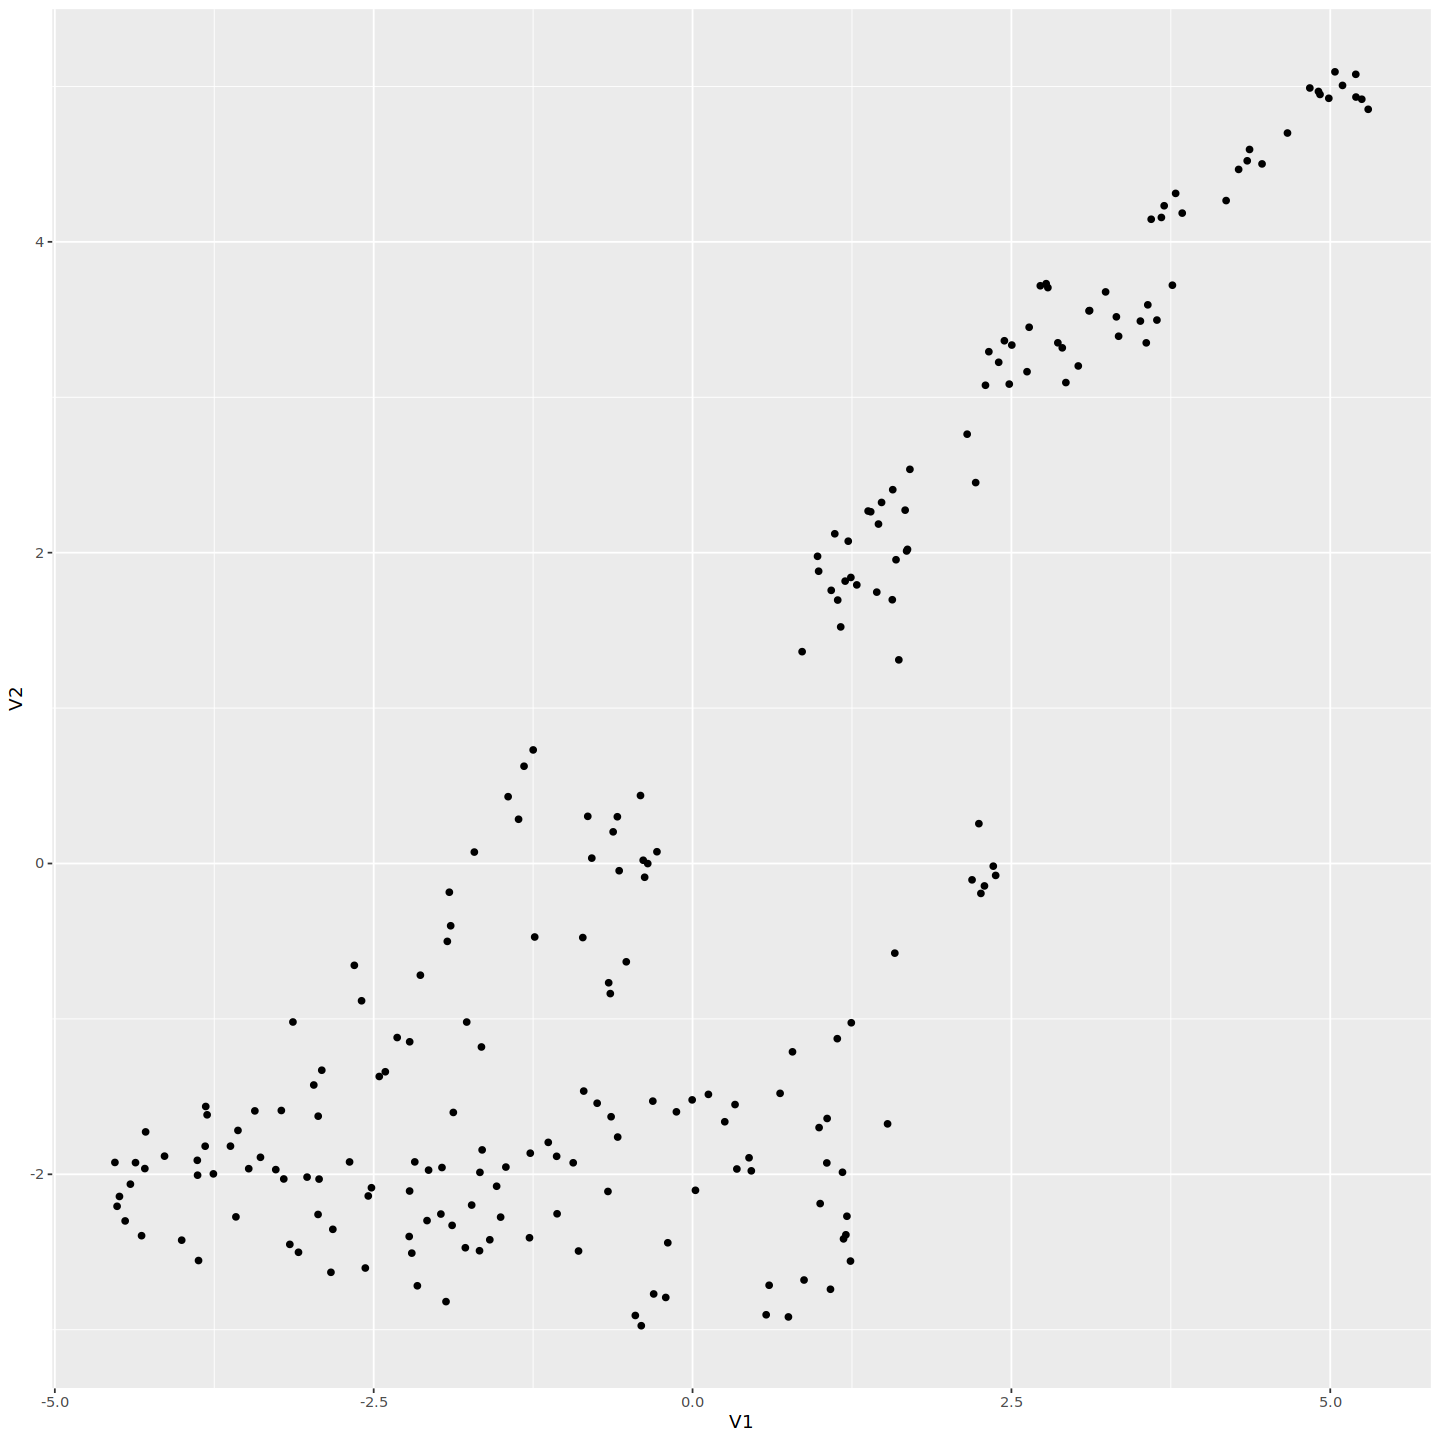

In [38]:
# variants grouping by umap
ggplot(df, aes(x=V1, y=V2)) +
  geom_point()

In [11]:
casted_MAF_VarBySample<-casted_MAF_VarBySample[,-1]

In [12]:
casted_MAF_VarBySample_cor<-cor(casted_MAF_VarBySample,method = "spearman")

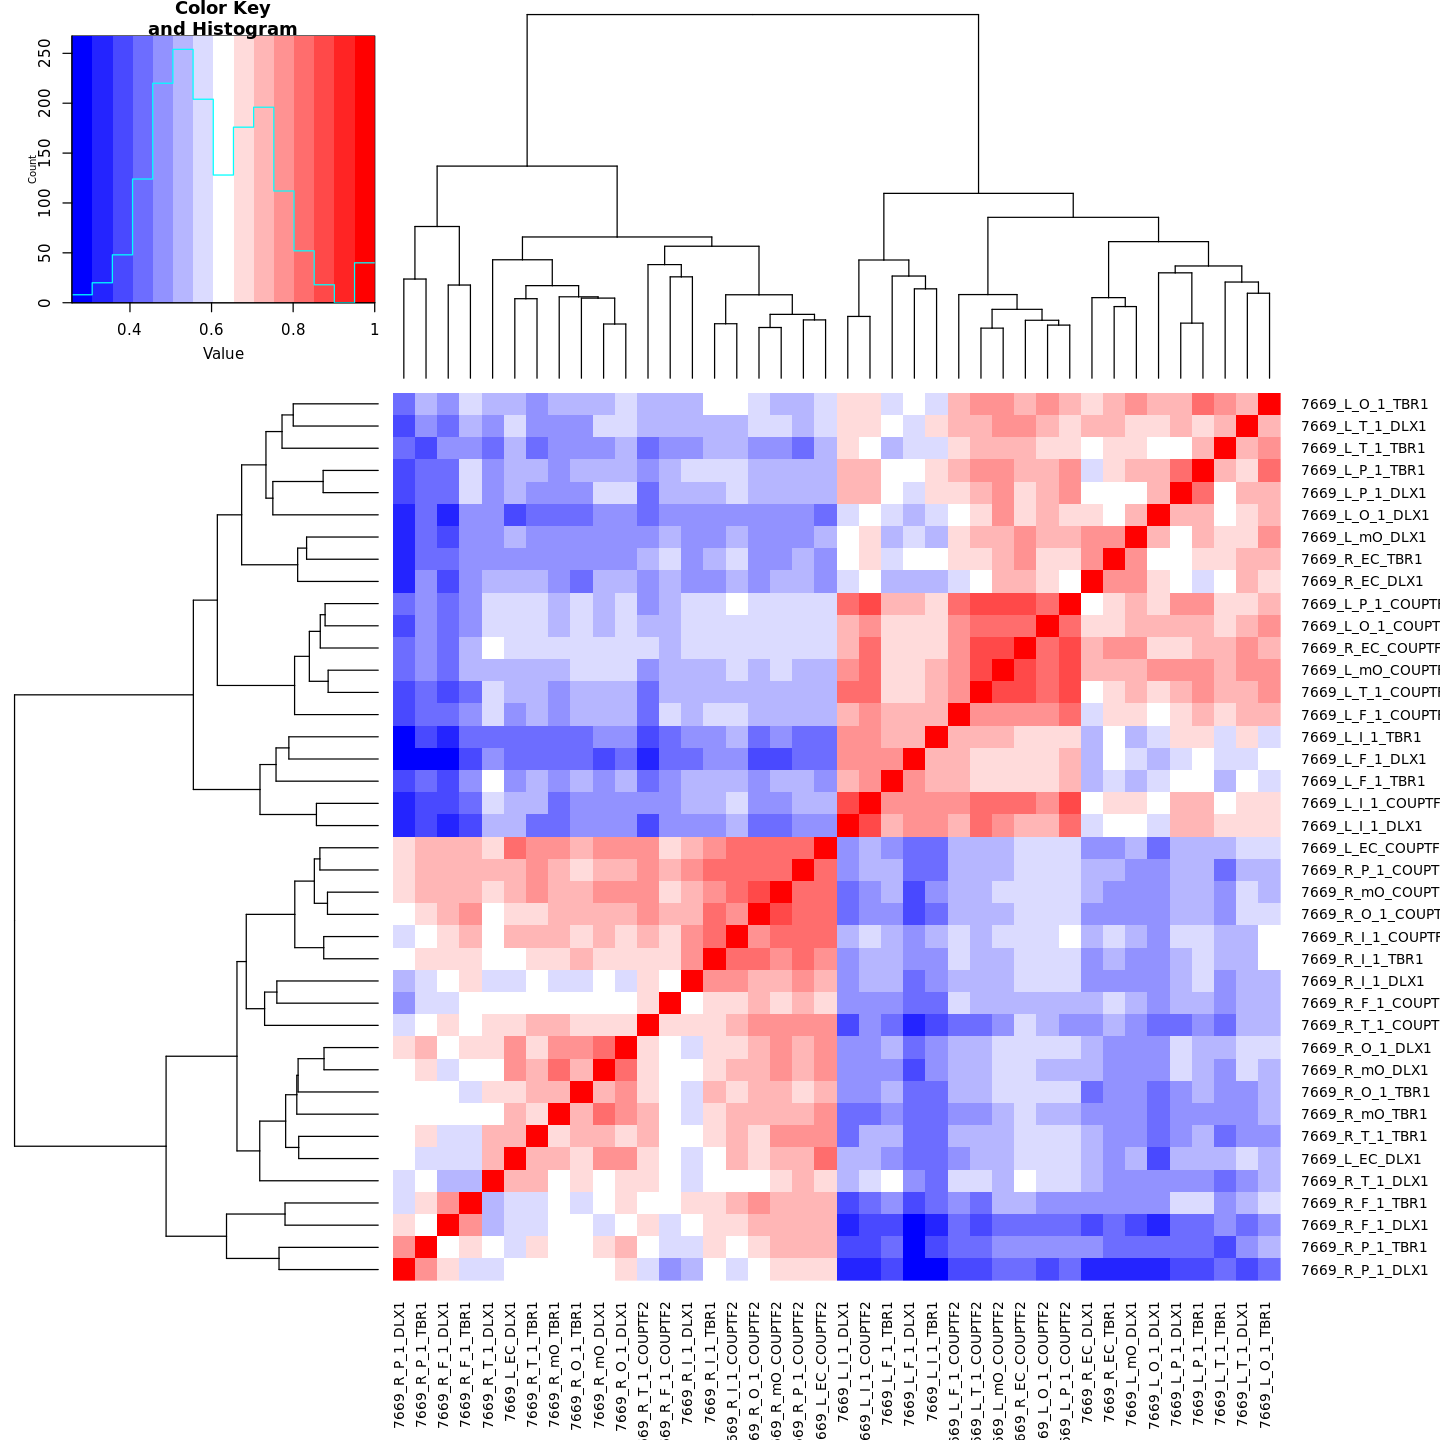

In [13]:
#sample grouping by heatmap
options(repr.plot.width=12, repr.plot.height=12)
heatmap.2(na.omit(casted_MAF_VarBySample_cor),trace="none",distfun = function(x) dist(x,method = 'euclidean'),col="bluered",margins=c(8,8))


In [14]:
pdf(file="7669_CTX_BG_sorted_heatmap_spearman.pdf",height=50,width=50)
heatmap.2(casted_MAF_VarBySample_cor,trace="none",col="bluered",margins=c(10,10))
dev.off()

png 
  2

# variants in TBR1 and DLX1

In [38]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
mosaic_filtered <- filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]
variant_list<-unique(filtered[filtered$Mosaic_shared_btw_WGS_Amp==1,]$CHROM.POS.REF.ALT)

variant_list<-as.data.frame(variant_list, row.names = variant_list )
variant_list$sample_number_presented <- NA

for (i in 1:nrow(variant_list)){
    filtered2 <- filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]
    n_row <- nrow(filtered2[filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$LOWER_CI>0.002360687 & 
          filtered[filtered$CHROM.POS.REF.ALT == variant_list[i,]$variant_list,]$UPPER_CI<0.4562841,])
    variant_list$sample_number_presented[i] <- n_row
    }

In [152]:
melt_mtcars<-mosaic_filtered[,c("ID", "MAF", "CHROM.POS.REF.ALT","Cell_Type","Organ",'Region','Punch','Hemisphere')]
melt_mtcars<-na.omit(melt_mtcars[melt_mtcars$CHROM.POS.REF.ALT %in% variant_list[variant_list$sample_number_presented>1,]$variant_list,])
melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('DLX1','TBR1','COUPTF2'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Cell_Type %in% c('Bulk'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Organ %in% c('CTX'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Region %in% c('P'),]
#melt_mtcars<-melt_mtcars[melt_mtcars$Hemisphere %in% c('L'),]
melt_mtcars<-melt_mtcars[melt_mtcars$Punch %in% c('1'
                                                  ,'2','3','4','5','6','7','8','9','10','11','12',
                                                 '13','14','15','16','17'
                                                 ),]
melt_mtcars$MAF <- sqrt(melt_mtcars$MAF)
melt_mtcars<-melt_mtcars[!(melt_mtcars$ID %in% c('7669_R_P_9_DLX1','7669_R_P_10_DLX1')),]

In [153]:
names(melt_mtcars)
head(melt_mtcars)

[1] "ID"                "MAF"               "CHROM.POS.REF.ALT"
[4] "Cell_Type"         "Organ"             "Region"           
[7] "Punch"             "Hemisphere"

ID                  MAF        CHROM.POS.REF.ALT Cell_Type Organ Region
9635 7669_L_CC_2_COUPTF2 0.00000000 1-9672930-G-A     COUPTF2   CTX   CC    
9641 7669_L_CC_2_COUPTF2 0.01455094 1-18387130-C-T    COUPTF2   CTX   CC    
9671 7669_L_CC_2_COUPTF2 0.18478337 1-55567901-G-T    COUPTF2   CTX   CC    
9674 7669_L_CC_2_COUPTF2 0.10953432 1-62675365-T-TTA  COUPTF2   CTX   CC    
9685 7669_L_CC_2_COUPTF2 0.00000000 1-74501501-C-T    COUPTF2   CTX   CC    
9702 7669_L_CC_2_COUPTF2 0.02220578 1-94219312-G-A    COUPTF2   CTX   CC    
     Punch Hemisphere
9635 2     L         
9641 2     L         
9671 2     L         
9674 2     L         
9685 2     L         
9702 2     L

In [154]:
casted_MAF_VarBySample <- dcast(melt_mtcars, CHROM.POS.REF.ALT~ID, value.var = "MAF" , na.rm=T)
rownames(casted_MAF_VarBySample) <- casted_MAF_VarBySample$CHROM.POS.REF.ALT
casted_MAF_VarBySample2 <- casted_MAF_VarBySample[,!(names(casted_MAF_VarBySample) %in% c("CHROM.POS.REF.ALT"))]

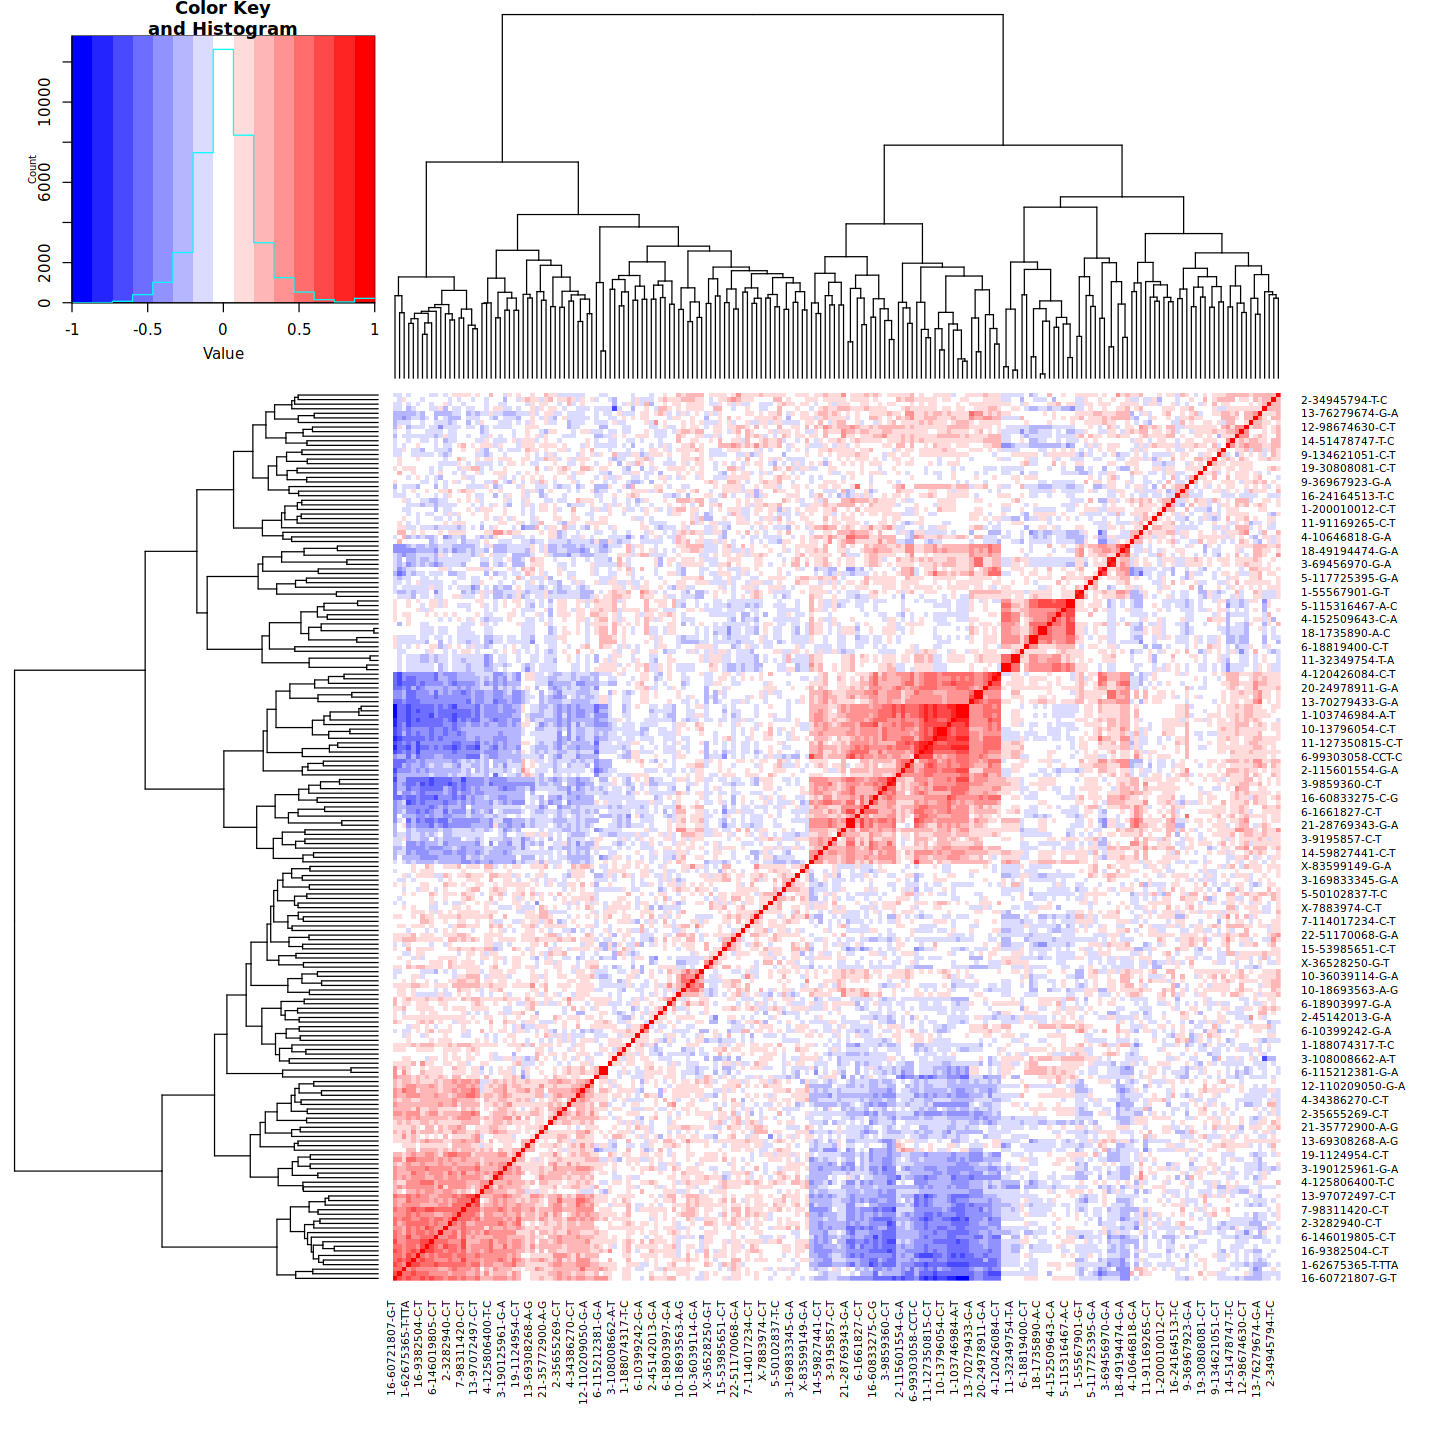

In [155]:
casted_MAF_VarBySample_cor<-cor(t(casted_MAF_VarBySample2),method = "spearman")
options(repr.plot.width=12, repr.plot.height=12)
heatmap.2(na.omit(casted_MAF_VarBySample_cor),trace="none",col="bluered",margins=c(8,8))

In [156]:
names(casted_MAF_VarBySample2)

[1] "7669_L_CC_2_COUPTF2"  "7669_L_CC_2_DLX1"     "7669_L_EC_COUPTF2"   
 [4] "7669_L_EC_DLX1"       "7669_L_F_1_COUPTF2"   "7669_L_F_1_DLX1"     
 [7] "7669_L_F_1_TBR1"      "7669_L_I_1_COUPTF2"   "7669_L_I_1_DLX1"     
[10] "7669_L_I_1_TBR1"      "7669_L_mO_COUPTF2"    "7669_L_mO_DLX1"      
[13] "7669_L_O_1_COUPTF2"   "7669_L_O_1_DLX1"      "7669_L_O_1_TBR1"     
[16] "7669_L_P_1_COUPTF2"   "7669_L_P_1_DLX1"      "7669_L_P_1_TBR1"     
[19] "7669_L_T_1_COUPTF2"   "7669_L_T_1_DLX1"      "7669_L_T_1_TBR1"     
[22] "7669_R_CC_Mid_TBR1"   "7669_R_CCMid_COUPTF2" "7669_R_CCMid_DLX1"   
[25] "7669_R_EC_COUPTF2"    "7669_R_EC_DLX1"       "7669_R_EC_TBR1"      
[28] "7669_R_F_1_COUPTF2"   "7669_R_F_1_DLX1"      "7669_R_F_1_TBR1"     
[31] "7669_R_I_1_COUPTF2"   "7669_R_I_1_DLX1"      "7669_R_I_1_TBR1"     
[34] "7669_R_mO_COUPTF2"    "7669_R_mO_DLX1"       "7669_R_mO_TBR1"      
[37] "7669_R_O_1_COUPTF2"   "7669_R_O_1_DLX1"      "7669_R_O_1_TBR1"     
[40] "7669_R_O_10_DLX1"     "7669_R_O_11_DLX1"     "7669_R_O_2_DLX1"     
[43] "7669_R_O_3_DLX1"      "7669_R_O_4_DLX1"      "7669_R_O_5_DLX1"     
[46] "7669_R_O_6_DLX1"      "7669_R_O_7_DLX1"      "7669_R_O_8_DLX1"     
[49] "7669_R_O_9_DLX1"      "7669_R_P_1_COUPTF2"   "7669_R_P_1_DLX1"     
[52] "7669_R_P_1_TBR1"      "7669_R_P_11_DLX1"     "7669_R_P_11_TBR1"    
[55] "7669_R_P_12_DLX1"     "7669_R_P_12_TBR1"     "7669_R_P_13_DLX1"    
[58] "7669_R_P_13_TBR1"     "7669_R_P_14_DLX1"     "7669_R_P_14_TBR1"    
[61] "7669_R_P_15_DLX1"     "7669_R_P_15_TBR1"     "7669_R_P_16_DLX1"    
[64] "7669_R_P_16_TBR1"     "7669_R_P_17_DLX1"     "7669_R_P_17_TBR1"    
[67] "7669_R_P_2_DLX1"      "7669_R_P_2_TBR1"      "7669_R_P_3_DLX1"     
[70] "7669_R_P_3_TBR1"      "7669_R_P_4_DLX1"      "7669_R_P_4_TBR1"     
[73] "7669_R_P_5_DLX1"      "7669_R_P_5_TBR1"      "7669_R_P_6_DLX1"     
[76] "7669_R_P_6_TBR1"      "7669_R_P_7_DLX1"      "7669_R_P_7_TBR1"     
[79] "7669_R_P_8_DLX1"      "7669_R_P_8_TBR1"      "7669_R_P_9_DLX"      
[82] "7669_R_P_9_TBR1"      "7669_R_T_1_COUPTF2"   "7669_R_T_1_DLX1"     
[85] "7669_R_T_1_TBR1"

In [168]:
# casted_MAF_VarBySample2<-casted_MAF_VarBySample2[,c(
# '7669_R_P_1_DLX1','7669_R_P_2_DLX1','7669_R_P_3_DLX1','7669_R_P_4_DLX1','7669_R_P_5_DLX1','7669_R_P_6_DLX1','7669_R_P_7_DLX1',
#     '7669_R_P_8_DLX1','7669_R_P_9_DLX','7669_R_P_11_DLX1','7669_R_P_12_DLX1','7669_R_P_13_DLX1','7669_R_P_14_DLX1','7669_R_P_15_DLX1',
#     '7669_R_P_16_DLX1','7669_R_P_17_DLX1','7669_R_P_1_TBR1','7669_R_P_2_TBR1','7669_R_P_3_TBR1','7669_R_P_4_TBR1','7669_R_P_5_TBR1',
#     '7669_R_P_6_TBR1','7669_R_P_7_TBR1','7669_R_P_8_TBR1','7669_R_P_9_TBR1','7669_R_P_11_TBR1','7669_R_P_12_TBR1','7669_R_P_13_TBR1',
#     '7669_R_P_14_TBR1','7669_R_P_15_TBR1','7669_R_P_16_TBR1','7669_R_P_17_TBR1'
#     )]

casted_MAF_VarBySample3<-casted_MAF_VarBySample2[,c('7669_R_F_1_DLX1','7669_R_I_1_DLX1','7669_R_mO_DLX1','7669_R_O_1_DLX1',
                                                    '7669_R_P_1_DLX1','7669_R_T_1_DLX1','7669_L_F_1_DLX1','7669_L_I_1_DLX1',
                                                    '7669_L_O_1_DLX1','7669_L_P_1_DLX1','7669_L_T_1_DLX1','7669_R_EC_DLX1',
                                                    '7669_R_P_2_DLX1','7669_R_P_3_DLX1','7669_R_P_4_DLX1','7669_R_P_5_DLX1',
                                                    '7669_R_P_6_DLX1','7669_R_P_7_DLX1',
                                                    '7669_R_P_8_DLX1','7669_R_P_9_DLX','7669_R_P_11_DLX1','7669_R_P_12_DLX1',
                                                    '7669_R_P_13_DLX1','7669_R_P_14_DLX1','7669_R_P_15_DLX1',
                                                    '7669_R_P_16_DLX1','7669_R_P_17_DLX1',
                                                    '7669_R_F_1_TBR1','7669_R_I_1_TBR1','7669_R_mO_TBR1','7669_R_O_1_TBR1',
                                                    '7669_R_P_1_TBR1','7669_R_T_1_TBR1','7669_L_F_1_TBR1','7669_L_I_1_TBR1',
                                                    '7669_L_O_1_TBR1','7669_L_P_1_TBR1','7669_L_T_1_TBR1','7669_R_EC_TBR1',
                                                    '7669_R_P_2_TBR1','7669_R_P_3_TBR1','7669_R_P_4_TBR1','7669_R_P_5_TBR1',
                                                    '7669_R_P_6_TBR1','7669_R_P_7_TBR1','7669_R_P_8_TBR1','7669_R_P_9_TBR1',
                                                    '7669_R_P_11_TBR1','7669_R_P_12_TBR1','7669_R_P_13_TBR1',
                                                    '7669_R_P_14_TBR1','7669_R_P_15_TBR1','7669_R_P_16_TBR1','7669_R_P_17_TBR1'
                                                   )]
casted_MAF_VarBySample4<-casted_MAF_VarBySample2[,c('7669_R_F_1_COUPTF2','7669_R_I_1_COUPTF2','7669_R_mO_COUPTF2','7669_R_O_1_COUPTF2',
                                                    '7669_R_P_1_COUPTF2','7669_R_T_1_COUPTF2','7669_L_F_1_COUPTF2','7669_L_I_1_COUPTF2',
                                                    '7669_L_O_1_COUPTF2','7669_L_P_1_COUPTF2','7669_L_T_1_COUPTF2','7669_R_EC_COUPTF2',
                                                    '7669_R_F_1_TBR1','7669_R_I_1_TBR1','7669_R_mO_TBR1','7669_R_O_1_TBR1',
                                                    '7669_R_P_1_TBR1','7669_R_T_1_TBR1','7669_L_F_1_TBR1','7669_L_I_1_TBR1',
                                                    '7669_L_O_1_TBR1','7669_L_P_1_TBR1','7669_L_T_1_TBR1','7669_R_EC_TBR1')]

casted_MAF_VarBySample5<-casted_MAF_VarBySample2[,c('7669_R_F_1_COUPTF2','7669_R_I_1_COUPTF2','7669_R_mO_COUPTF2','7669_R_O_1_COUPTF2',
                                                    '7669_R_P_1_COUPTF2','7669_R_T_1_COUPTF2','7669_L_F_1_COUPTF2','7669_L_I_1_COUPTF2',
                                                    '7669_L_O_1_COUPTF2','7669_L_P_1_COUPTF2','7669_L_T_1_COUPTF2','7669_R_EC_COUPTF2',
                                                    '7669_R_F_1_DLX1','7669_R_I_1_DLX1','7669_R_mO_DLX1','7669_R_O_1_DLX1',
                                                    '7669_R_P_1_DLX1','7669_R_T_1_DLX1','7669_L_F_1_DLX1','7669_L_I_1_DLX1',
                                                    '7669_L_O_1_DLX1','7669_L_P_1_DLX1','7669_L_T_1_DLX1','7669_R_EC_DLX1')]

# casted_MAF_VarBySample2<-casted_MAF_VarBySample2[,c('7669_L_F_1_DLX1','7669_L_I_1_DLX1','7669_L_O_1_DLX1',
#                                                     '7669_L_P_1_DLX1','7669_L_T_1_DLX1','7669_R_EC_DLX1',
#                                                     '7669_L_F_1_TBR1','7669_L_I_1_TBR1','7669_L_O_1_TBR1',
#                                                     '7669_L_P_1_TBR1','7669_L_T_1_TBR1','7669_R_EC_TBR1')]
# casted_MAF_VarBySample2<-casted_MAF_VarBySample2[,c('7669_L_F_1_COUPTF2','7669_L_I_1_COUPTF2','7669_L_O_1_COUPTF2',
#                                                     '7669_L_P_1_COUPTF2','7669_L_T_1_COUPTF2','7669_R_EC_COUPTF2',
#                                                     '7669_L_F_1_TBR1','7669_L_I_1_TBR1','7669_L_O_1_TBR1',
#                                                     '7669_L_P_1_TBR1','7669_L_T_1_TBR1','7669_R_EC_TBR1')]
# casted_MAF_VarBySample2<-casted_MAF_VarBySample2[,c('7669_L_F_1_COUPTF2','7669_L_I_1_COUPTF2','7669_L_O_1_COUPTF2',
#                                                     '7669_L_P_1_COUPTF2','7669_L_T_1_COUPTF2','7669_R_EC_COUPTF2',
#                                                     '7669_L_F_1_DLX1','7669_L_I_1_DLX1','7669_L_O_1_DLX1',
#                                                     '7669_L_P_1_DLX1','7669_L_T_1_DLX1','7669_R_EC_DLX1')]

In [182]:
casted_MAF_VarBySample3

7669_R_F_1_DLX1 7669_R_I_1_DLX1 7669_R_mO_DLX1 7669_R_O_1_DLX1
1-102152318-C-T  0.02680923      0.01926881      0.075467488    0.03085773     
1-103746984-A-T  0.41606817      0.37500000      0.460087178    0.41826006     
1-113168020-C-T  0.02941813      0.07387919      0.068041382    0.06667447     
1-116835962-G-A  0.13608276      0.09850106      0.021526542    0.02004817     
1-159646818-C-T  0.02322354      0.02388683      0.008935341    0.03997315     
1-177430967-T-C  0.04267653      0.04087685      0.045557900    0.03019715     
1-18387130-C-T   0.02502021      0.01453786      0.052193480    0.02449024     
1-188074317-T-C  0.08000409      0.05830909      0.090747369    0.05128683     
1-200010012-C-T  0.03561384      0.01525518      0.042196108    0.02502347     
1-245457480-G-A  0.07236666      0.06890618      0.036044891    0.02305158     
1-55567901-G-T   0.21678622      0.24702147      0.205066882    0.14624743     
1-62675365-T-TTA 0.00000000      0.01456328      0.000000000    0.00000000     
1-74501501-C-T   0.02283486      0.01397679      0.000000000    0.01047479     
1-94219312-G-A   0.03336857      0.02828201      0.031473630    0.02306533     
1-9672930-G-A    0.02494937      0.02694351      0.000000000    0.01971424     
10-123873718-C-T 0.09501707      0.15069514      0.193428726    0.21185224     
10-126824209-G-A 0.02958071      0.01983799      0.015273555    0.03425304     
10-12696593-A-G  0.43331182      0.35541333      0.467417062    0.40150689     
10-13796054-C-T  0.12677941      0.11818103      0.176008084    0.11043700     
10-18693563-A-G  0.02146244      0.01541474      0.045590152    0.03394026     
10-18760480-C-T  0.08186457      0.03701166      0.093397800    0.02881473     
10-23976083-C-A  0.03403547      0.00000000      0.015791661    0.02032159     
10-25610159-G-A  0.01343402      0.05219168      0.014230641    0.01271540     
10-36039114-G-A  0.01387525      0.01848527      0.023885623    0.02771252     
10-58457040-T-G  0.03711537      0.05805231      0.059648756    0.05575238     
10-79843135-G-A  0.01769981      0.00000000      0.019341962    0.01723626     
11-111580997-G-A 0.13453660      0.04545689      0.060269637    0.10009202     
11-11681099-G-C  0.01611751      0.02025271      0.013976107    0.01715869     
11-125271170-G-C 0.01944591      0.02037848      0.026207121    0.01690309     
11-127350815-C-T 0.15791700      0.04232131      0.037474391    0.05575224     
⋮                ⋮               ⋮               ⋮              ⋮              
6-99303058-CCT-C 0.026703245     0.000000000     0.028052646    0.007154364    
7-109736410-A-T  0.000000000     0.000000000     0.009063237    0.007862568    
7-114017234-C-T  0.020010809     0.022885432     0.020475073    0.017783575    
7-139192862-C-T  0.023882406     0.073694862     0.076471911    0.067291071    
7-147380993-G-A  0.025476452     0.069225767     0.107648092    0.161625855    
7-20852978-C-A   0.015392511     0.000000000     0.019726706    0.012254497    
7-226651-G-A     0.009003895     0.011899704     0.018982305    0.016056619    
7-24504428-A-G   0.180431908     0.222817130     0.155448899    0.181460918    
7-9192631-C-T    0.110188772     0.038477353     0.107152308    0.092164030    
7-98311420-C-T   0.020052204     0.022070162     0.020090207    0.021470032    
8-20774226-G-A   0.023807837     0.021152477     0.018654422    0.016809691    
8-29866666-C-T   0.036926954     0.029662082     0.025268782    0.024768026    
8-58808555-G-A   0.069236729     0.034274524     0.032416997    0.156674670    
8-62438170-G-A   0.022787811     0.061096597     0.049239912    0.037847704    
8-66303042-C-T   0.100098571     0.076562912     0.011780751    0.030135411    
9-103766822-C-T  0.015176272     0.000000000     0.015036886    0.007150888    
9-119721731-C-T  0.023827541     0.009171610     0.019727665    0.026390714    
9-134621051-C-T  0.573276906     0.550606557     0.574093548    0.566684670    
9-36967923-G-A   

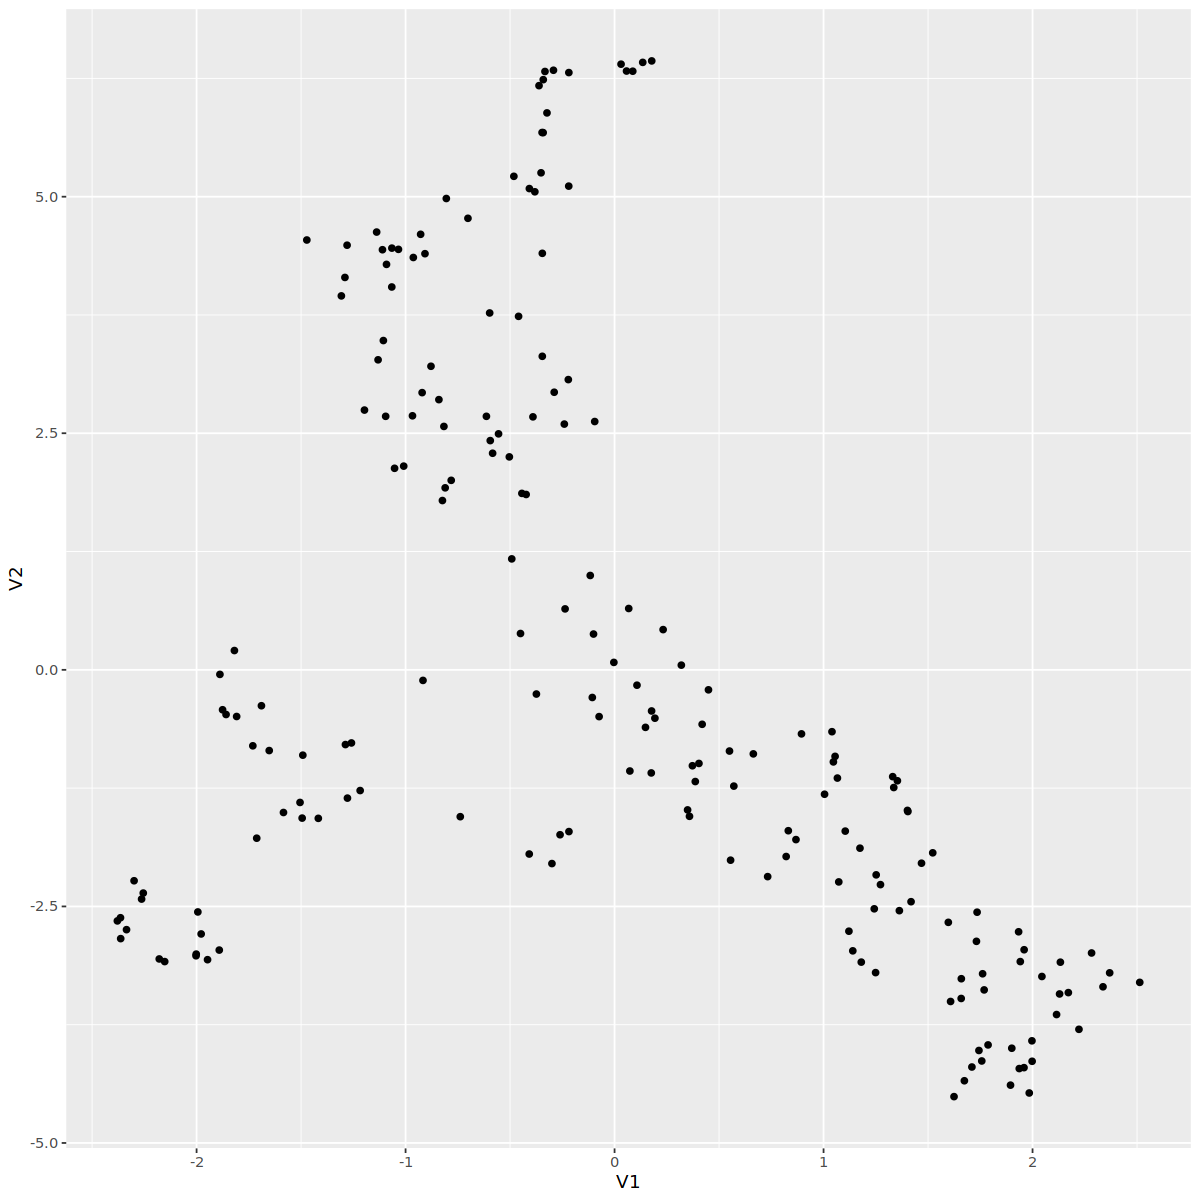

In [191]:
casted_MAF_VarBySample_umap3<-umap(casted_MAF_VarBySample3)

df<-as.data.frame(casted_MAF_VarBySample_umap3$layout)

# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
ggplot(df, aes(x=V1, y=V2)) +
  geom_point()

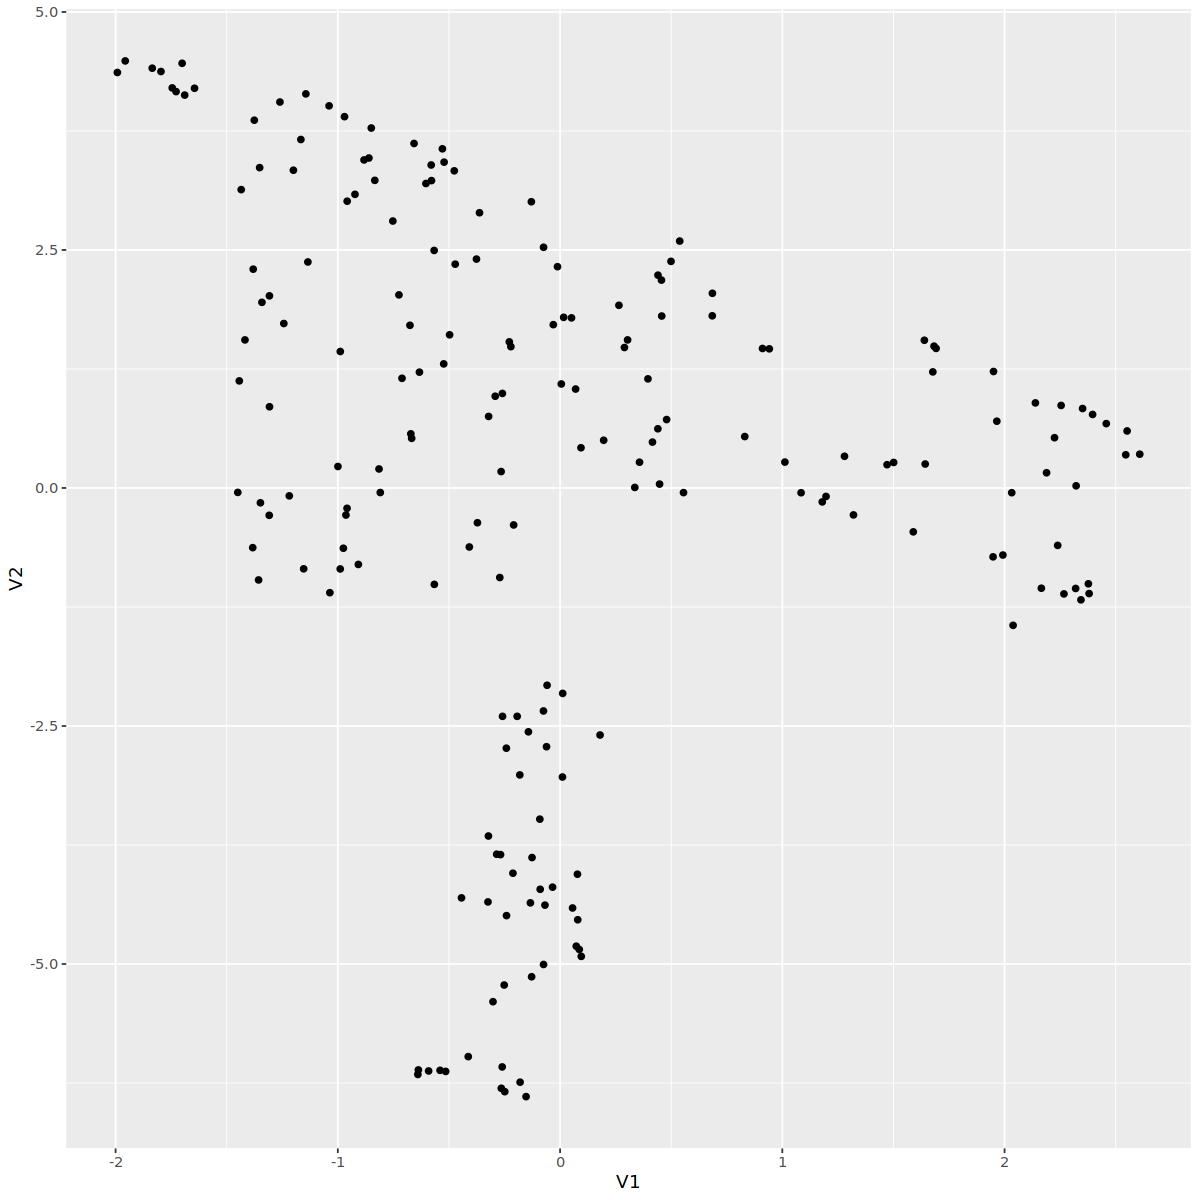

In [188]:
casted_MAF_VarBySample_umap4<-umap(casted_MAF_VarBySample4)

df<-as.data.frame(casted_MAF_VarBySample_umap4$layout)

# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
ggplot(df, aes(x=V1, y=V2)) +
  geom_point()

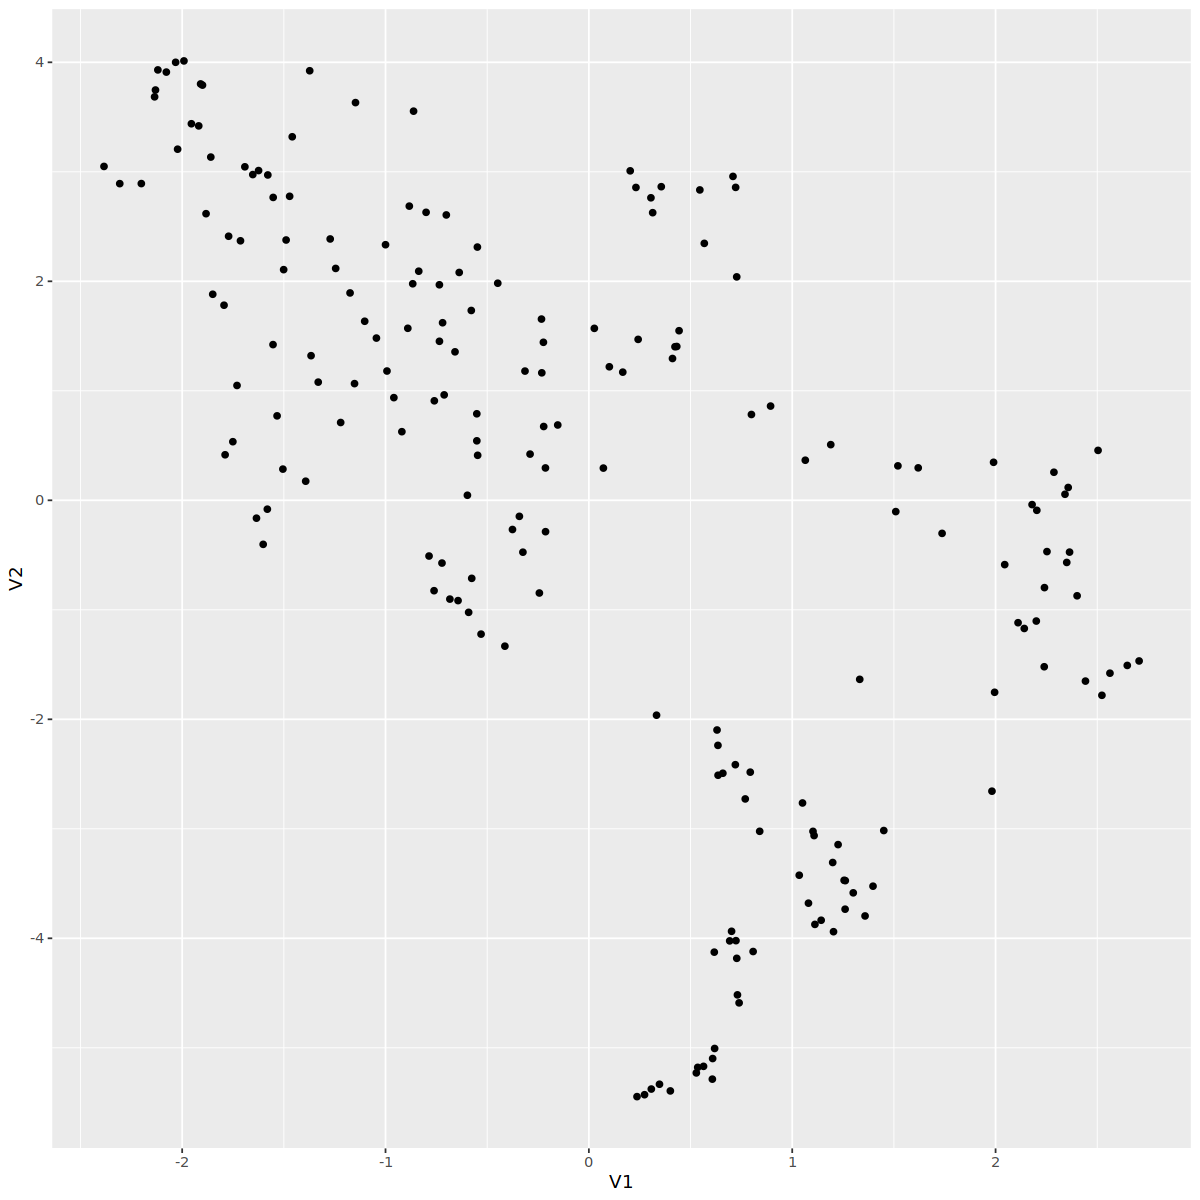

In [189]:
casted_MAF_VarBySample_umap5<-umap(casted_MAF_VarBySample5)

df<-as.data.frame(casted_MAF_VarBySample_umap5$layout)

# variants grouping by umap
options(repr.plot.width=10,repr.plot.height=10)
ggplot(df, aes(x=V1, y=V2)) +
  geom_point()

In [169]:
correlation <- NA
for (i in 1:nrow(casted_MAF_VarBySample3)){
    a<-cor(t(casted_MAF_VarBySample3[i,c(1:27)]), t(casted_MAF_VarBySample3[i,c(28:54)]),method = "spearman")
    correlation[i]<-a[1]
    }

correlation<-as.data.frame(correlation)
correlation$sample <-'7614'
correlation<-na.omit(correlation)

In [170]:
options(repr.plot.width=3, repr.plot.height=10)
p1 <- ggplot(correlation,aes(y=correlation,x=sample)) + 
  geom_violin() + geom_point(position = position_jitter(seed = 1, width = 0.2))

In [171]:
correlation <- NA
for (i in 1:nrow(casted_MAF_VarBySample4)){
    a<-cor(t(casted_MAF_VarBySample4[i,c(1:12)]), t(casted_MAF_VarBySample4[i,c(13:24)]),method = "spearman")
    correlation[i]<-a[1]
    }

correlation<-as.data.frame(correlation)
correlation$sample <-'7614'
correlation<-na.omit(correlation)

In [172]:
options(repr.plot.width=3, repr.plot.height=10)
p2 <- ggplot(correlation,aes(y=correlation,x=sample)) + 
  geom_violin() + geom_point(position = position_jitter(seed = 1, width = 0.2))

In [173]:
correlation <- NA
for (i in 1:nrow(casted_MAF_VarBySample5)){
    a<-cor(t(casted_MAF_VarBySample5[i,c(1:12)]), t(casted_MAF_VarBySample5[i,c(13:24)]),method = "spearman")
    correlation[i]<-a[1]
    }

correlation<-as.data.frame(correlation)
correlation$sample <-'7614'
correlation<-na.omit(correlation)

In [174]:
options(repr.plot.width=3, repr.plot.height=10)
p3 <- ggplot(correlation,aes(y=correlation,x=sample)) + 
  geom_violin() + geom_point(position = position_jitter(seed = 1, width = 0.2))

Warning message:
“Removed 5 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 5 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 5 rows containing missing values (`geom_point()`).”


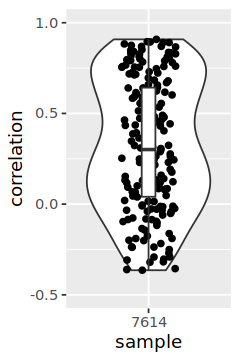

Warning message:
“Removed 3 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


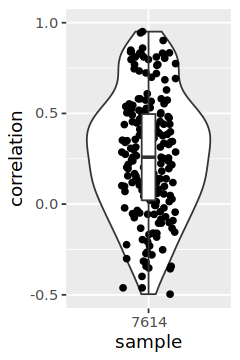

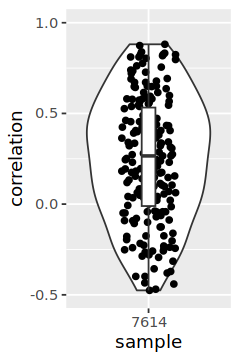

In [198]:
options(repr.plot.width=2, repr.plot.height=3)

p1+geom_boxplot(width=.1)+ylim(-0.5, 1)
p2+geom_boxplot(width=.1)+ylim(-0.5, 1)
p3+geom_boxplot(width=.1)+ylim(-0.5, 1)

In [3]:
filtered <- read.table("../20230101_QC/final_summary_anno3.txt",header=T,sep="\t")
variant_anno <- read.table("../variant_annotation/780_variant_annotation.csv",header=T,sep=",")

In [11]:
CTX_only_variants<-variant_anno[variant_anno$CTX==1,]$variant_list

[1] 0.01230281

[1] 0.01139929

[1] 0.01223134

[1] 0.01175598

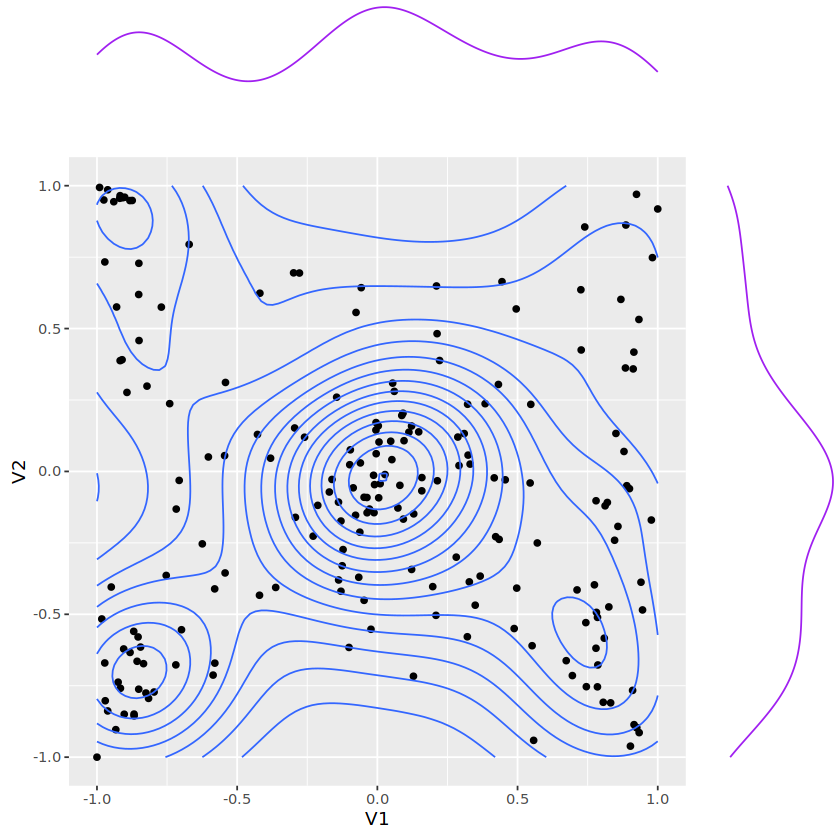

In [12]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% CTX_only_variants)

Right <- subset(filtered_brain_only, Hemisphere %in% c('R') & Cell_Type %in% c('Bulk') & Organ=='CTX' & Punch=='1')
Left <- subset(filtered_brain_only, Hemisphere %in% c('L')& Cell_Type %in% c('Bulk') & Organ=='CTX' & Punch=='1')
Dor <- subset(filtered_brain_only, AntPost %in% c('Ant')& Cell_Type %in% c('Bulk') & Organ=='CTX' & Punch=='1') 
Ven <- subset(filtered_brain_only, AntPost %in% c('Post')& Cell_Type %in% c('Bulk') & Organ=='CTX' & Punch=='1') 

sum(Right$MAF, na.rm = TRUE)/length(Right$MAF)
sum(Left$MAF, na.rm = TRUE)/length(Left$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(CTX_only_variants)){
    xx<-subset(Right, CHROM.POS.REF.ALT==CTX_only_variants[i])
    yy<-subset(Left, CHROM.POS.REF.ALT==CTX_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(CTX_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==CTX_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==CTX_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1,1)+ylim(-1,1)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [8]:
brain_only_variants<-variant_anno[variant_anno$CTX_BG_only==1,]$variant_list
length(brain_only_variants)

[1] 58

[1] 0.000713736

[1] 0.002216792

[1] 0.001549254

[1] 0.001281362

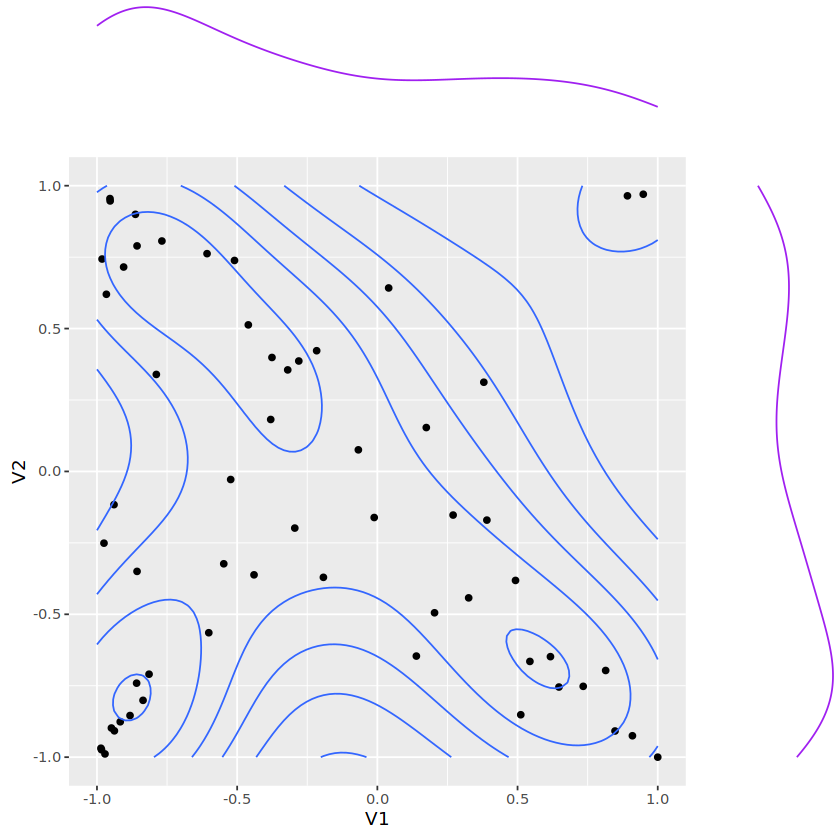

In [9]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)
#'Bulk','TBR1','DLX1','COUPTF2','NeuN'
Right <- subset(filtered_brain_only, Hemisphere %in% c('R') & Cell_Type %in% c('Bulk') & Organ=='BG')
Left <- subset(filtered_brain_only, Hemisphere %in% c('L')& Cell_Type %in% c('Bulk') & Organ=='BG')
Dor <- subset(filtered_brain_only, AntPost %in% c('Ant')& Cell_Type %in% c('Bulk') & Organ=='BG') 
Ven <- subset(filtered_brain_only, AntPost %in% c('Post')& Cell_Type %in% c('Bulk') & Organ=='BG') 

sum(Right$MAF, na.rm = TRUE)/length(Right$MAF)
sum(Left$MAF, na.rm = TRUE)/length(Left$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Right, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Left, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1,1)+ylim(-1,1)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [10]:
brain_only_variants<-variant_anno[variant_anno$Brain_only==1,]$variant_list

[1] 0.000694221

[1] 0.0007792286

[1] 0.0007873078

[1] 0.00066489

Warning message:
“Removed 2 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 2 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


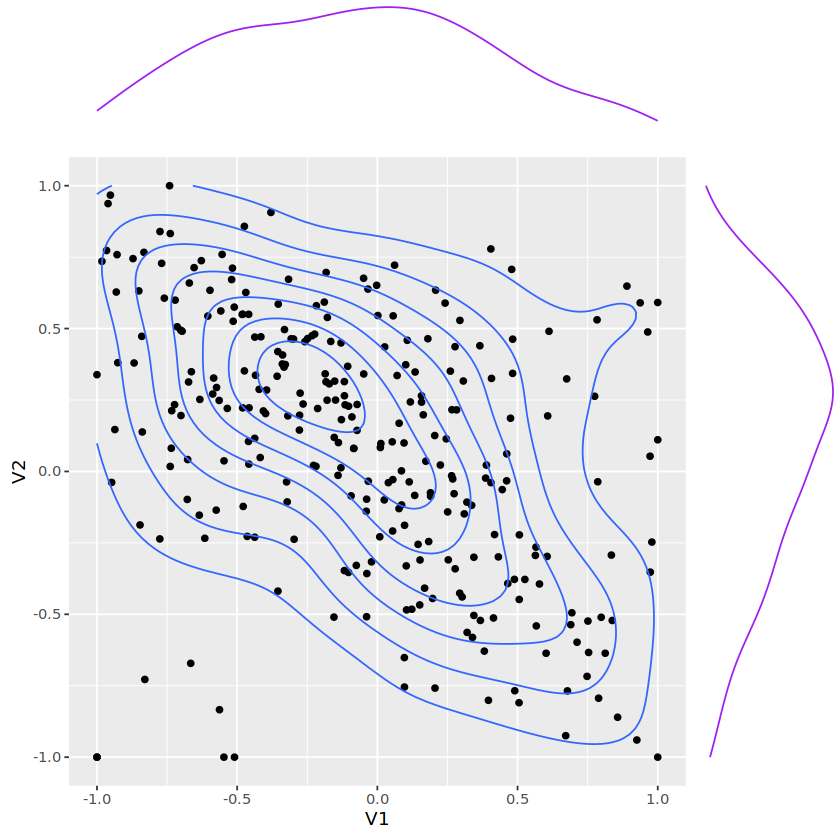

In [11]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)
#'Bulk','TBR1','DLX1','COUPTF2','NeuN'
Right <- subset(filtered_brain_only, Hemisphere %in% c('R') & Cell_Type %in% c('DLX1') & Organ=='BG')
Left <- subset(filtered_brain_only, Hemisphere %in% c('L')& Cell_Type %in% c('DLX1') & Organ=='BG')
Dor <- subset(filtered_brain_only, AntPost %in% c('Ant')& Cell_Type %in% c('DLX1') & Organ=='BG') 
Ven <- subset(filtered_brain_only, AntPost %in% c('Post')& Cell_Type %in% c('DLX1') & Organ=='BG') 

sum(Right$MAF, na.rm = TRUE)/length(Right$MAF)
sum(Left$MAF, na.rm = TRUE)/length(Left$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Right, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Left, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1,1)+ylim(-1,1)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

# Left hemisphere CTX variants

In [15]:
brain_only_variants<-variant_anno[variant_anno$Left_only==1,]$variant_list

[1] 0.001351115

[1] 0.0007832217

[1] 0.0009466711

[1] 0.0004985504

Warning message:
“Removed 4 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_point()`).”


[1] 20

[1] 42

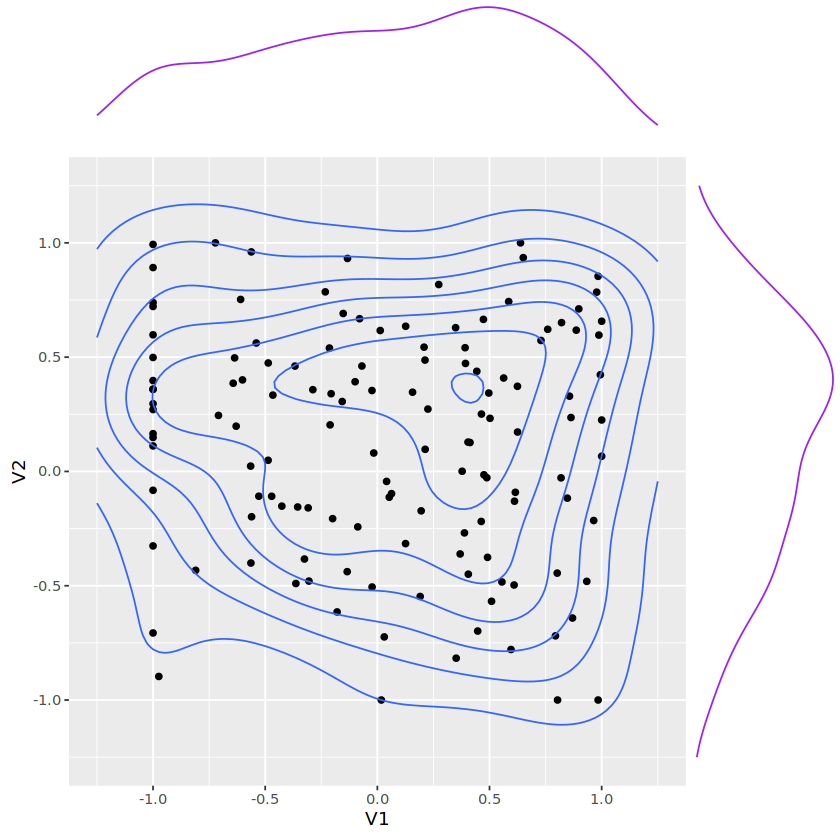

In [16]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Region %in% c('F') & Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='L' )
Post <- subset(filtered_brain_only, Region %in% c('O','mO')& Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='L' )
Dor <- subset(filtered_brain_only, Region %in% c('P','CC') & Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='L' )
Ven <- subset(filtered_brain_only, Region %in% c('T','EC')& Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='L' )


sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.0006079908

[1] 0.0006392991

[1] 0.0006727463

[1] 0.0005102191

Warning message:
“Removed 3 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


[1] 11

[1] 31

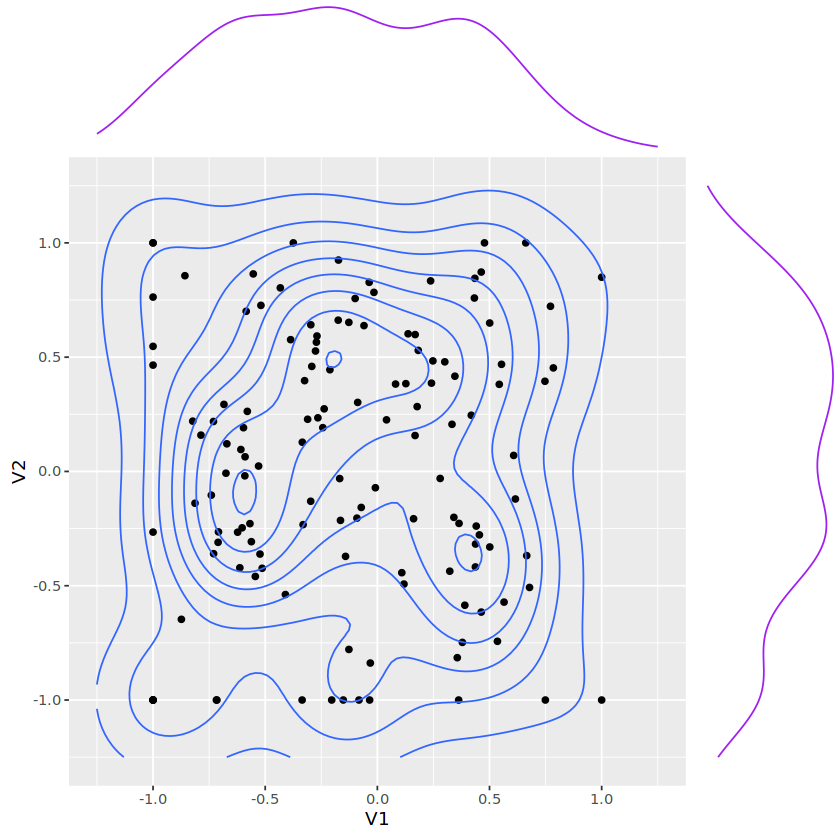

In [17]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Region %in% c('F') & Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='L'& Punch=='1')
Post <- subset(filtered_brain_only, Region %in% c('O','mO')& Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='L'& Punch=='1')
Dor <- subset(filtered_brain_only, Region %in% c('P','CC')& Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='L'& Punch %in% c('1'))
Ven <- subset(filtered_brain_only, Region %in% c('T','EC')& Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='L'& Punch%in% c('1'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.001060054

[1] 0.0008296247

[1] 0.0009913968

[1] 0.0005971639

Warning message:
“Removed 7 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 7 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


[1] 20

[1] 42

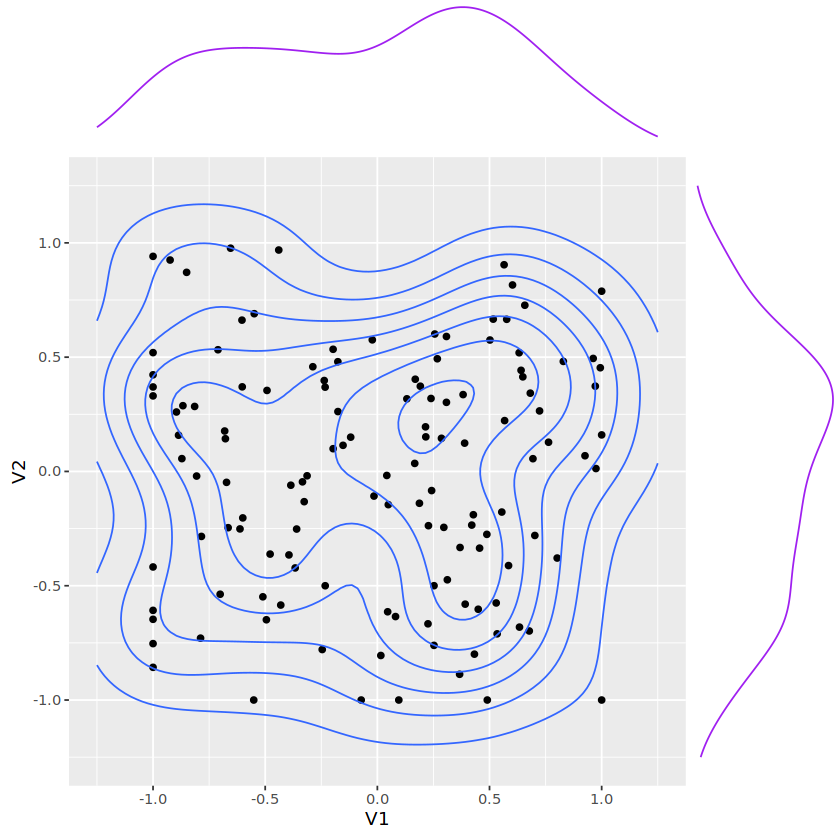

In [18]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Region %in% c('F') & Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='L'& Punch %in% c('1'))
Post <- subset(filtered_brain_only, Region %in% c('O','mO')& Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='L'& Punch %in% c('1'))
Dor <- subset(filtered_brain_only, Region %in% c('P','CC')& Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='L'& Punch %in% c('1'))
Ven <- subset(filtered_brain_only, Region %in% c('T','EC')& Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='L'& Punch %in% c('1'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

In [38]:
binom.test(20,148,p=46/148, alternative='two.sided',# 4978 successes, 25000 trials, with 0.2 hypothesized probability of success
                      conf.level = 0.95)


	Exact binomial test

data:  20 and 148
number of successes = 20, number of trials = 148, p-value = 1.136e-06
alternative hypothesis: true probability of success is not equal to 0.3108108
95 percent confidence interval:
 0.08453867 0.20096368
sample estimates:
probability of success 
             0.1351351 


# Right hemisphere CTX BG variants

In [19]:
brain_only_variants<-variant_anno[variant_anno$Right_only==1,]$variant_list

[1] 0.001073844

[1] 0.0006887068

[1] 0.0008010621

[1] 0.0005344525

Warning message:
“Removed 6 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


[1] 42

[1] 145

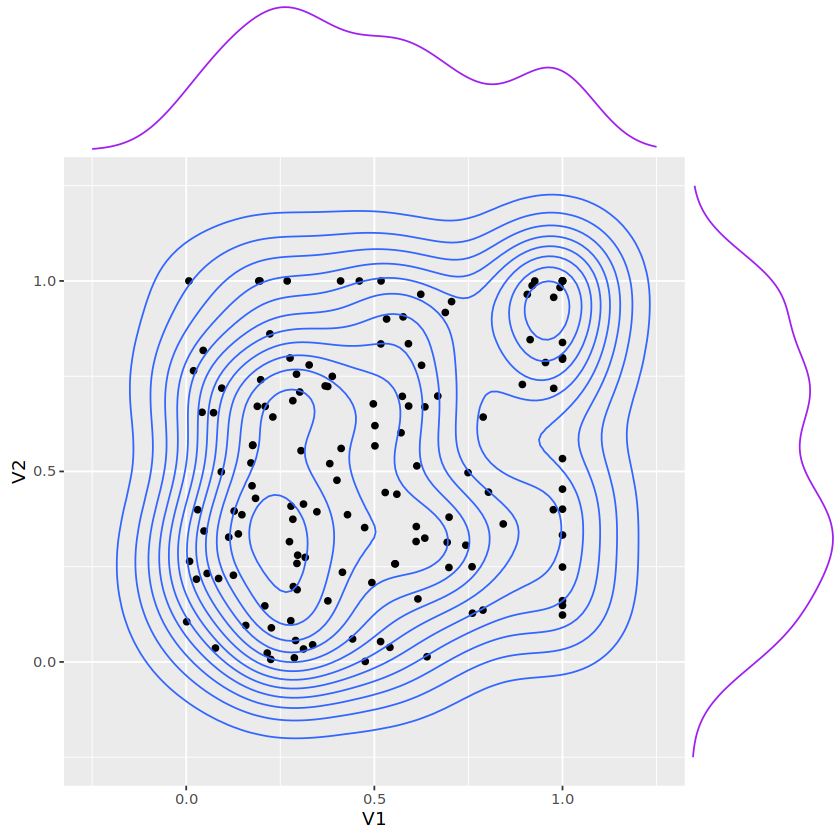

In [20]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Region %in% c('F') & Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Post <- subset(filtered_brain_only, Region %in% c('O','mO')& Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Dor <- subset(filtered_brain_only, Region %in% c('P','I','CC')& Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Ven <- subset(filtered_brain_only, Region %in% c('T','EC')& Cell_Type=='DLX1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.0004712565

[1] 0.0005975523

[1] 0.0005282461

[1] 0.000600109

Warning message:
“Removed 9 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 9 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


[1] 46

[1] 145

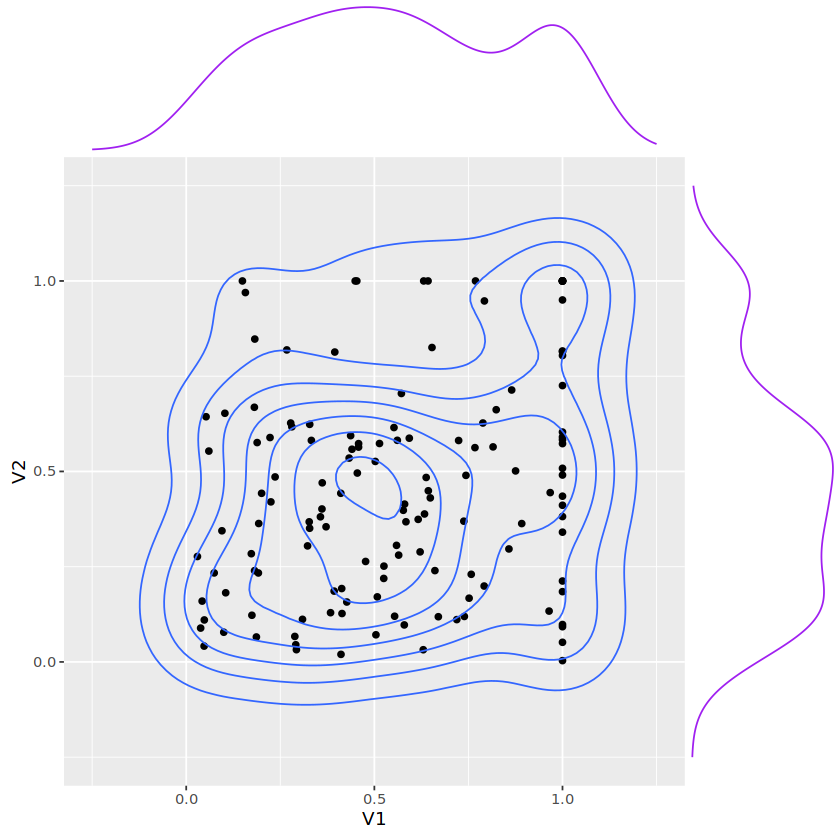

In [21]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Region %in% c('F') & Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Post <- subset(filtered_brain_only, Region %in% c('O','mO')& Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Dor <- subset(filtered_brain_only, Region %in% c('P','I','CC')& Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Ven <- subset(filtered_brain_only, Region %in% c('T','EC')& Cell_Type=='COUPTF2' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.0006412723

[1] 0.0006763246

[1] 0.0007367846

[1] 0.0004871983

Warning message:
“Removed 9 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 9 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 9 rows containing missing values (`geom_point()`).”


[1] 47

[1] 145

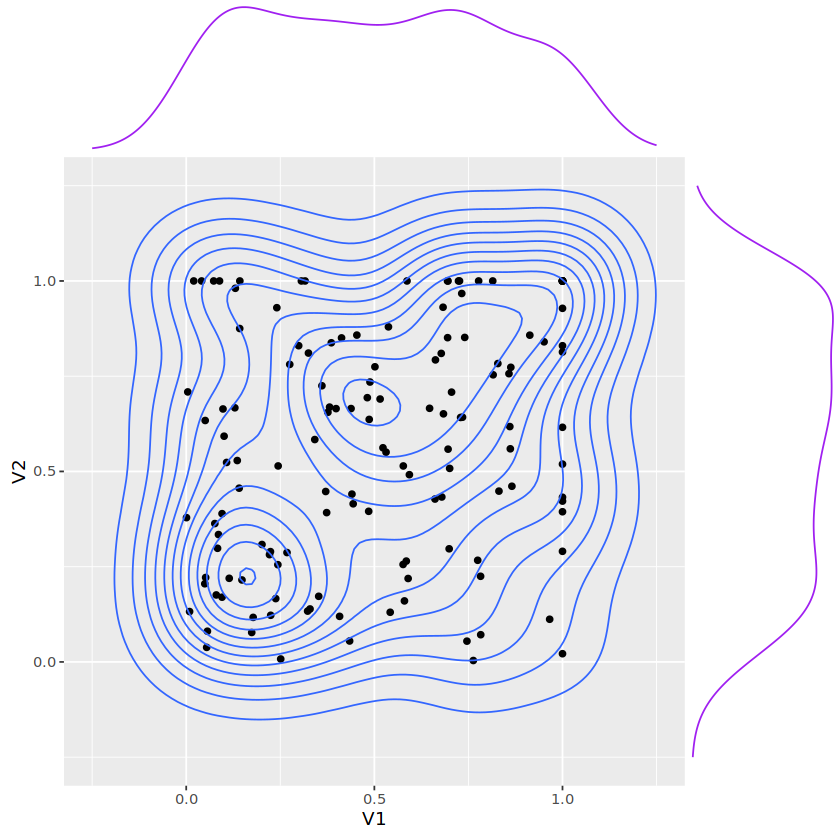

In [22]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Region %in% c('F') & Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Post <- subset(filtered_brain_only, Region %in% c('O','mO')& Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Dor <- subset(filtered_brain_only, Region %in% c('P','I','CC')& Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))
Ven <- subset(filtered_brain_only, Region %in% c('T','EC')& Cell_Type=='TBR1' & Organ=='CTX' & Hemisphere=='R'& Punch %in% c('1'))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.0008711759

[1] 0.000800956

[1] 0.0008711759

[1] 0.0006612204

Warning message:
“Removed 44 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 44 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 44 rows containing missing values (`geom_point()`).”


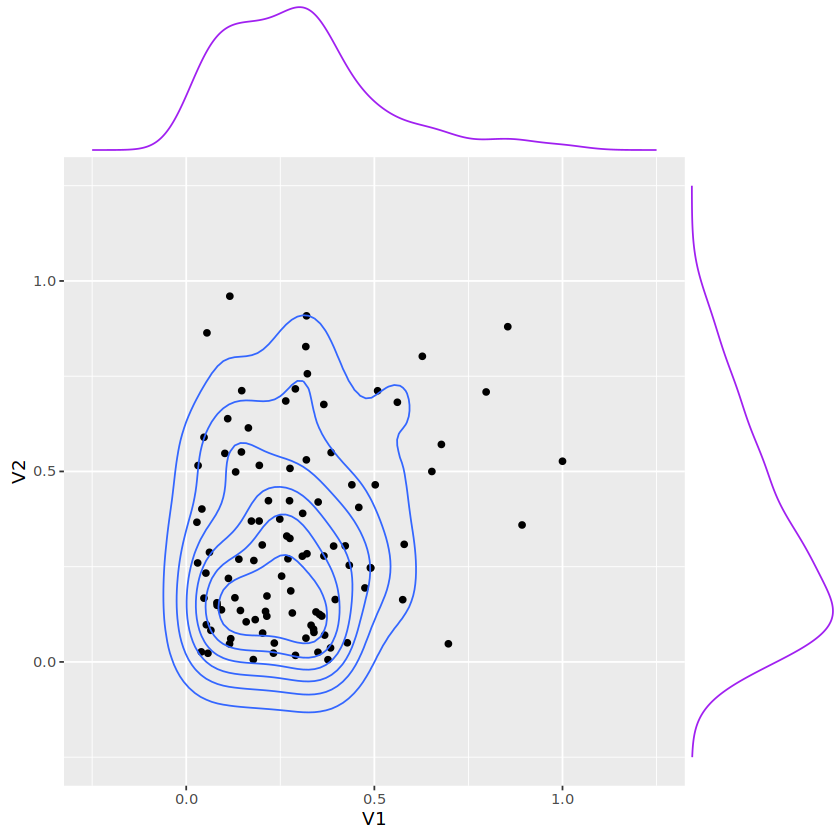

In [38]:
brain_only_variants<-variant_anno[variant_anno$Right_only==1,]$variant_list

Ant <- subset(filtered_brain_only, Cell_Type=='DLX1'  & Hemisphere=='R' & Punch=='1')
Post <- subset(filtered_brain_only, Cell_Type=='TBR1'  & Hemisphere=='R' & Punch=='1')
Dor <- subset(filtered_brain_only, Cell_Type=='DLX1' & Hemisphere=='R' & Punch=='1')
Ven <- subset(filtered_brain_only, Cell_Type=='COUPTF2' & Hemisphere=='R' & Punch=='1')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [39]:
pdf(file="7669_rightonly_COUPTF2_vs_TBR1_vs_DLX1_scatterplot.pdf",height=10,width=10)
p
dev.off()

Warning message:
“Removed 44 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 44 rows containing missing values (`geom_point()`).”


png 
  2

In [25]:
brain_only_variants<-variant_anno[variant_anno$Left_only==1,]$variant_list

[1] 0.0008406062

[1] 0.0008245344

[1] 0.0008406062

[1] 0.000631194

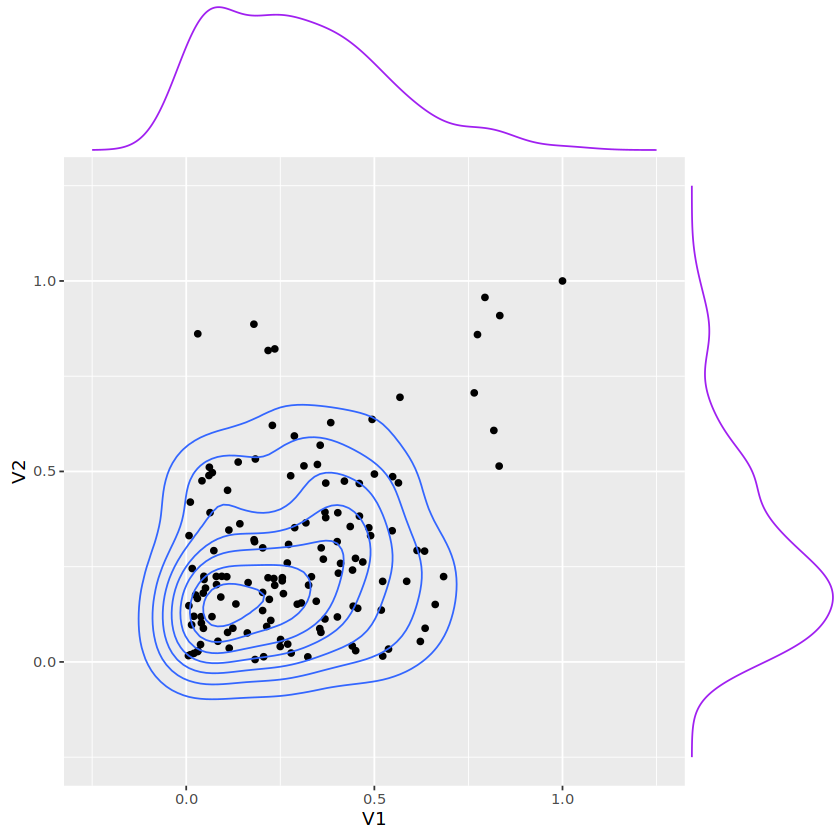

In [26]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Cell_Type=='DLX1'  & Hemisphere=='L' & Punch=='1')
Post <- subset(filtered_brain_only, Cell_Type=='TBR1'  & Hemisphere=='L' & Punch=='1')
Dor <- subset(filtered_brain_only, Cell_Type=='DLX1' & Hemisphere=='L' & Punch=='1')
Ven <- subset(filtered_brain_only, Cell_Type=='COUPTF2' & Hemisphere=='L' & Punch=='1')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

# Right parietal lobe clonal distribution with CTX BG variants

In [29]:
brain_only_variants<-variant_anno[which(variant_anno$Right_only==1 & variant_anno$THAL_only==0)  ,]$variant_list

[1] 0.0008732254

[1] 0.0008447058

[1] 0.0007784128

[1] 0.0007571755

[1] 12

[1] 101

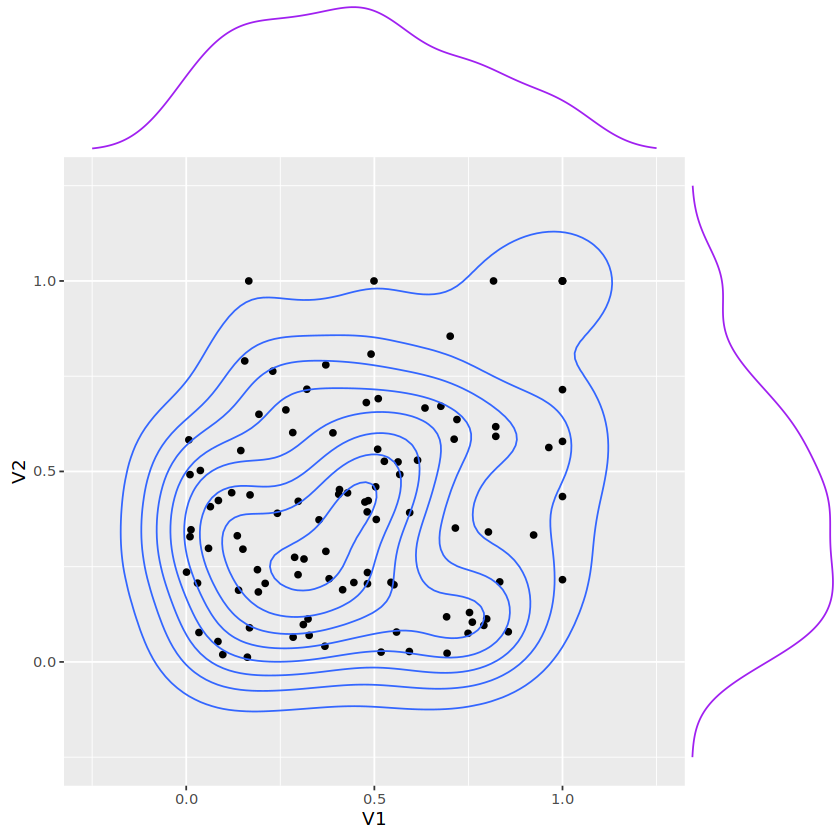

In [30]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

# Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A') & Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
# Post <- subset(filtered_brain_only, Location %in% c('NEAR_P')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
# Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
# Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A','FAR_A') & Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('NEAR_P','FAR_P')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D','FAR_D')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V','FAR_V')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])


[1] 0.000836287

[1] 0.0007552785

[1] 0.0006923502

[1] 0.0007685966

[1] 13

[1] 101

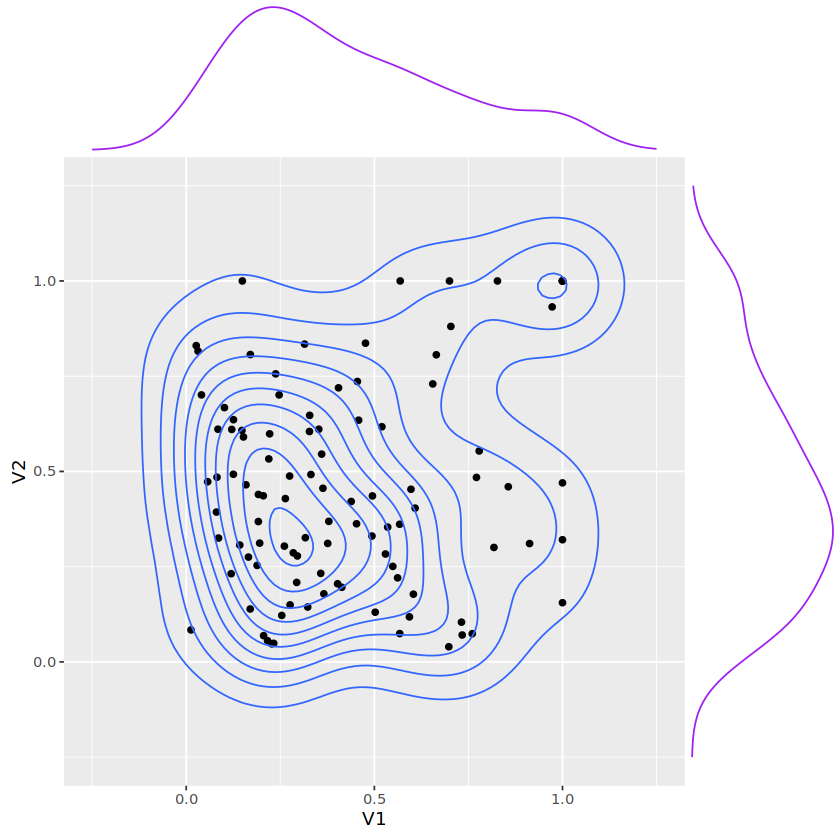

In [31]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

# Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A') & Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
# Post <- subset(filtered_brain_only, Location %in% c('NEAR_P')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
# Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
# Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A','FAR_A') & Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('NEAR_P','FAR_P')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D','FAR_D')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V','FAR_V')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.000836784

[1] 0.0006646049

[1] 0.0006236415

[1] 0.0008617242

[1] 10

[1] 101

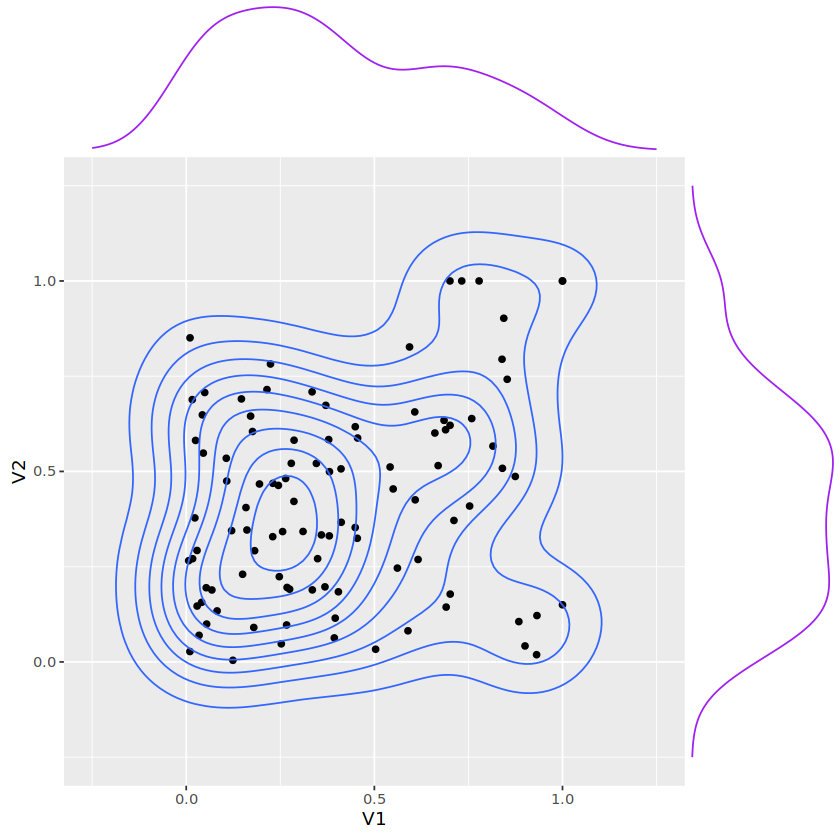

In [32]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

# Ant <- subset(filtered_brain_only, Location %in% c('FAR_A') & Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
# Post <- subset(filtered_brain_only, Location %in% c('FAR_P')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
# Dor <- subset(filtered_brain_only, Location %in% c('FAR_D')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
# Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Ant <- subset(filtered_brain_only, Location %in% c('FAR_A','FAR_AD','FAR_AV') & Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('FAR_P','FAR_PD','FAR_PV')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('FAR_D','FAR_PD','FAR_AD')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('FAR_V','FAR_PV','FAR_AV')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.0007884321

[1] 0.0007691527

[1] 0.0007483892

[1] 0.0006838914

[1] 4

[1] 100

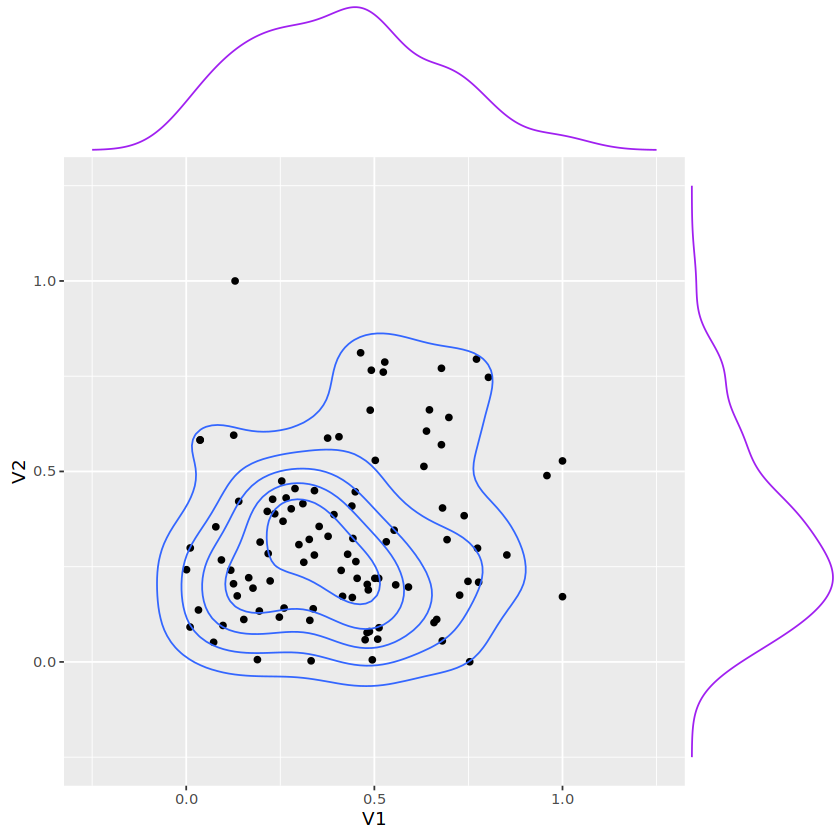

In [77]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)


Ant <- subset(filtered_brain_only, Location %in% c('FAR_A','FAR_AD','FAR_AV') & Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('FAR_P','FAR_PD','FAR_PV')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('FAR_D','FAR_PD','FAR_AD')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('FAR_V','FAR_PV','FAR_AV')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)
nrow(delta[delta$V1>0.9 | delta$V2>0.9,])
nrow(delta[delta$V1>0 & delta$V2>0,])

[1] 0.0008459372

[1] 0.0007563048

[1] 0.0007157267

[1] 0.0008578516

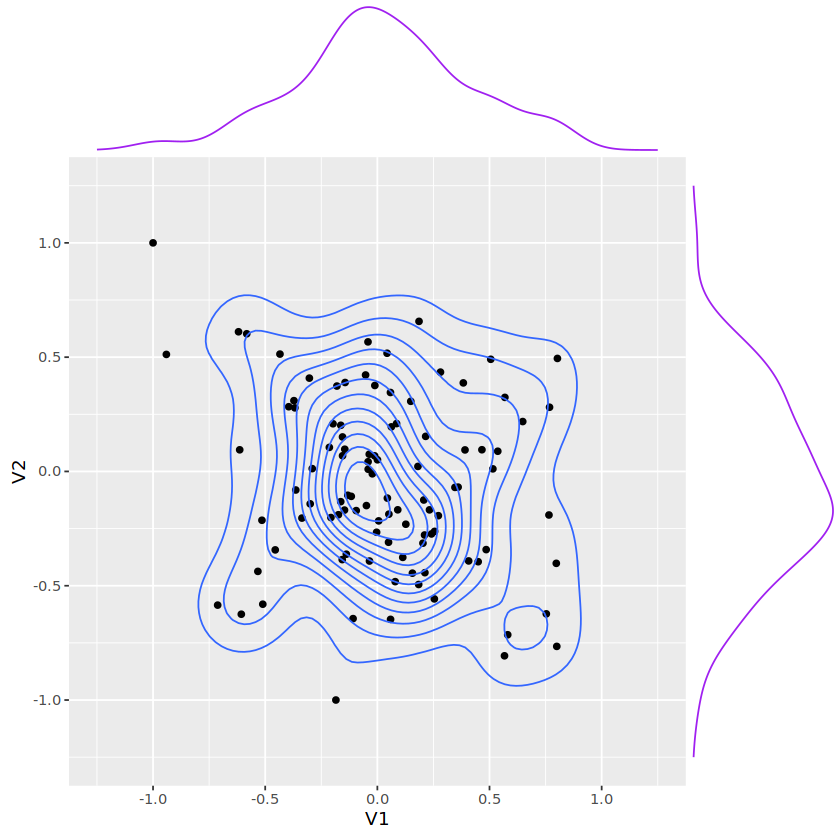

In [33]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A','NEAR_AD','NEAR_AV','FAR_A','FAR_AD','FAR_AV') & Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('NEAR_P','NEAR_PD','NEAR_PV','FAR_P','FAR_PD','FAR_PV')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D','NEAR_PD','NEAR_AD','FAR_D','FAR_PD','FAR_AD')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V','NEAR_PV','NEAR_AV','FAR_V','FAR_PV','FAR_AV')& Cell_Type=='TBR1' & Region=='P' & Hemisphere=='R')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

[1] 0.0008420494

[1] 0.00083914

[1] 0.0008535231

[1] 0.0007644882

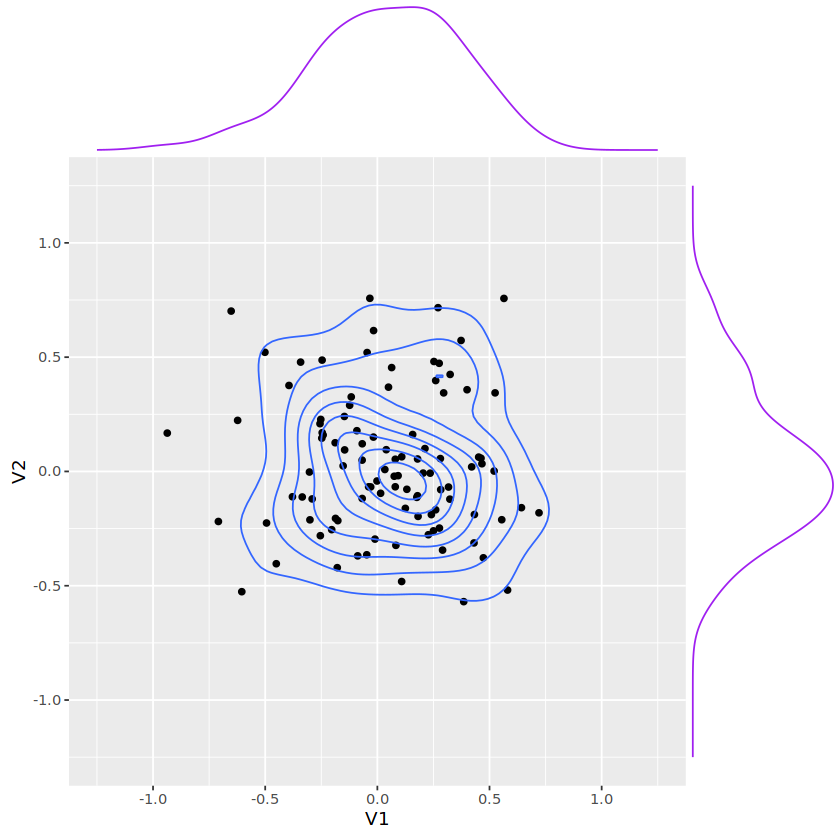

In [34]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A','NEAR_AD','NEAR_AV','FAR_A','FAR_AD','FAR_AV') & Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('NEAR_P','NEAR_PD','NEAR_PV','FAR_P','FAR_PD','FAR_PV')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D','NEAR_PD','NEAR_AD','FAR_D','FAR_PD','FAR_AD')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V','NEAR_PV','NEAR_AV','FAR_V','FAR_PV','FAR_AV')& Cell_Type=='DLX1' & Region=='P' & Hemisphere=='R')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

[1] 0.0007980956

[1] 0.0006884372

[1] 0.0006707546

[1] 0.0007286625

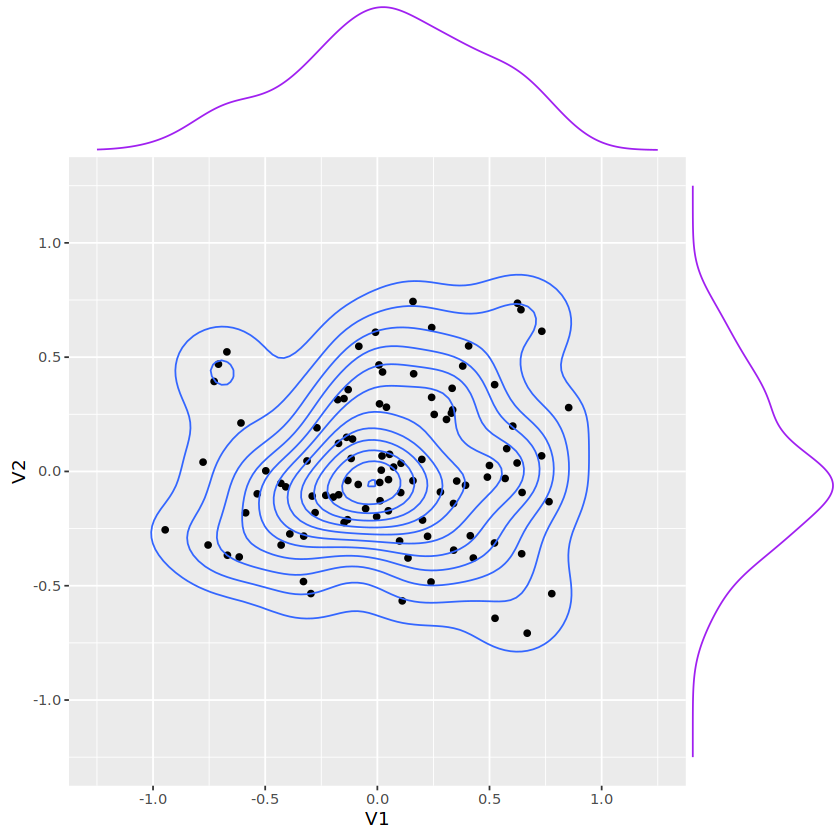

In [83]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Location %in% c('FAR_A','FAR_AD','FAR_AV') & Cell_Type%in%c('TBR1','DLX1') & Region=='P' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('FAR_P','FAR_PD','FAR_PV')& Cell_Type%in%c('TBR1','DLX1') & Region=='P' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('FAR_D','FAR_PD','FAR_AD')& Cell_Type%in%c('TBR1','DLX1') & Region=='P' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('FAR_V','FAR_PV','FAR_AV')& Cell_Type%in%c('TBR1','DLX1') & Region=='P' & Hemisphere=='R')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [37]:
binom.test(4,106,p=10/106, # 4978 successes, 25000 trials, with 0.2 hypothesized probability of success
                      conf.level = 0.95)


	Exact binomial test

data:  4 and 106
number of successes = 4, number of trials = 106, p-value = 0.04498
alternative hypothesis: true probability of success is not equal to 0.09433962
95 percent confidence interval:
 0.01037586 0.09380564
sample estimates:
probability of success 
            0.03773585 


In [36]:
brain_only_variants<-variant_anno[which(variant_anno$Right_only==1 & variant_anno$THAL_only==0)  ,]$variant_list

[1] 0.001058017

[1] 0.0009417706

[1] 0.0009585002

[1] 0.001119406

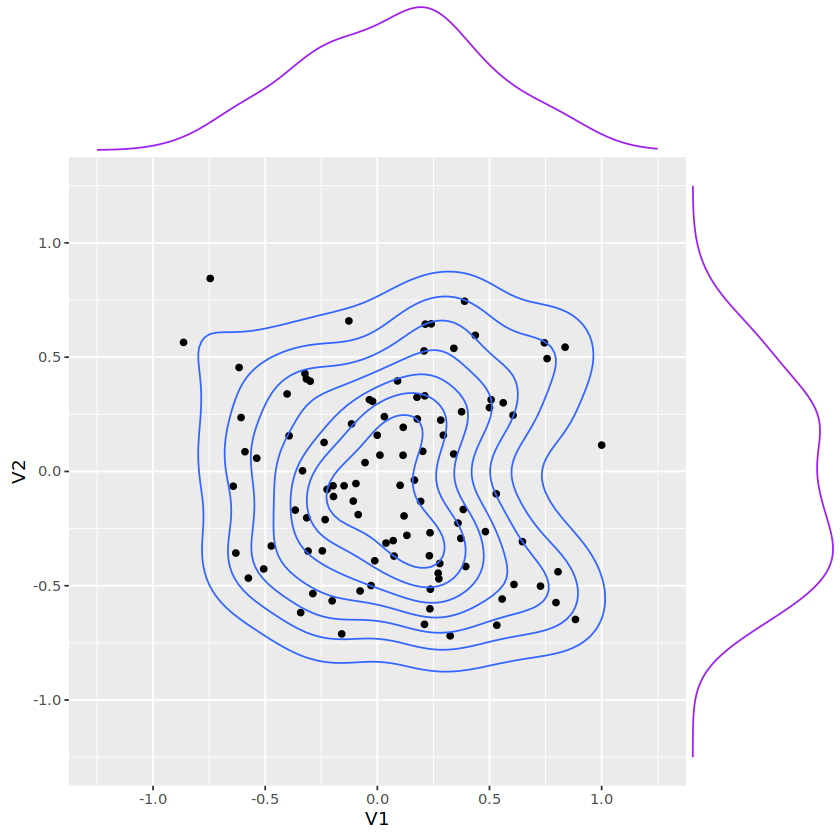

In [37]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Location %in% c('NEAR_A','NEAR_AD','NEAR_AV','FAR_A','FAR_AD','FAR_AV') & Cell_Type=='DLX1' & Region=='O' & Hemisphere=='R')
Post <- subset(filtered_brain_only, Location %in% c('NEAR_P','NEAR_PD','NEAR_PV','FAR_P','FAR_PD','FAR_PV')& Cell_Type=='DLX1' & Region=='O' & Hemisphere=='R')
Dor <- subset(filtered_brain_only, Location %in% c('NEAR_D','NEAR_PD','NEAR_AD','FAR_D','FAR_PD','FAR_AD')& Cell_Type=='DLX1' & Region=='O' & Hemisphere=='R')
Ven <- subset(filtered_brain_only, Location %in% c('NEAR_V','NEAR_PV','NEAR_AV','FAR_V','FAR_PV','FAR_AV')& Cell_Type=='DLX1' & Region=='O' & Hemisphere=='R')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

# BG vs CTX AP correlation

In [88]:
brain_only_variants<-variant_anno[which(variant_anno$Brain_only==1)  ,]$variant_list

[1] 0.001125001

[1] 0.001093206

[1] 0.001733936

[1] 0.0008352747

Warning message:
“Removed 7 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 7 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 7 rows containing missing values (`geom_point()`).”


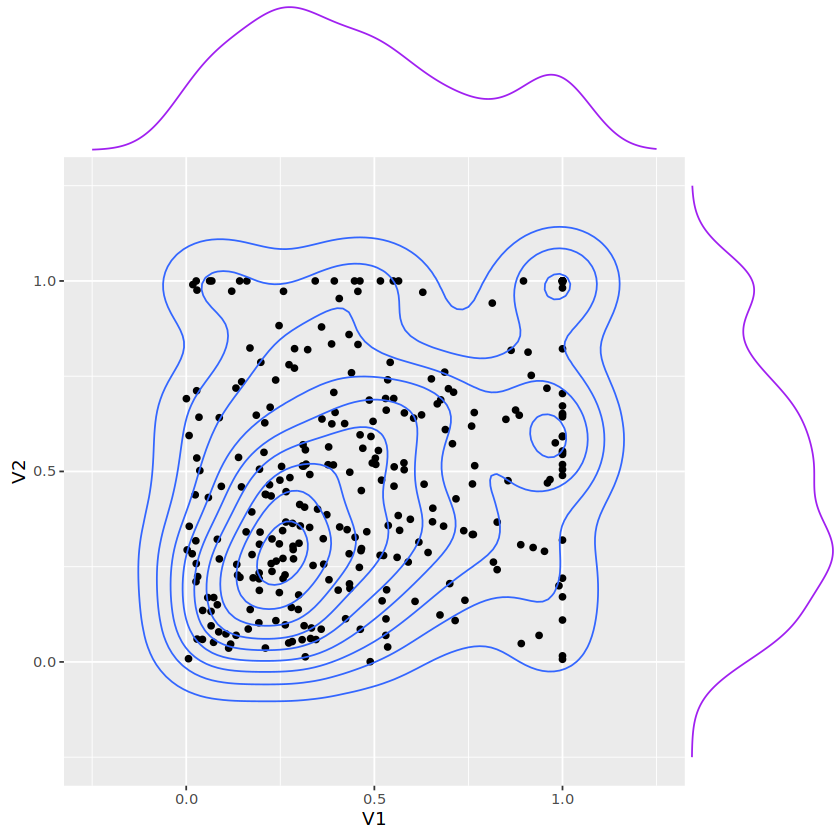

In [89]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Organ %in% c('BG') & Cell_Type=='Bulk' & AntPost=='Ant'& !(Hemisphere %in% c('R') ))
Post <- subset(filtered_brain_only, Organ %in% c('BG')& Cell_Type=='Bulk' & AntPost=='Post'& !(Hemisphere %in% c('R')))
Dor <- subset(filtered_brain_only, Organ %in% c('CTX')& Cell_Type=='Bulk' & AntPost=='Ant'& !(Hemisphere %in% c('R')))
Ven <- subset(filtered_brain_only, Organ %in% c('CTX')& Cell_Type=='Bulk' & AntPost=='Post'& !(Hemisphere %in% c('R')))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [91]:
brain_only_variants<-variant_anno[which(variant_anno$Brain_only==1)  ,]$variant_list

[1] 0.0007858765

[1] 0.000668599

[1] 0.0007831987

[1] 0.0007123382

Warning message:
“Removed 6 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 6 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


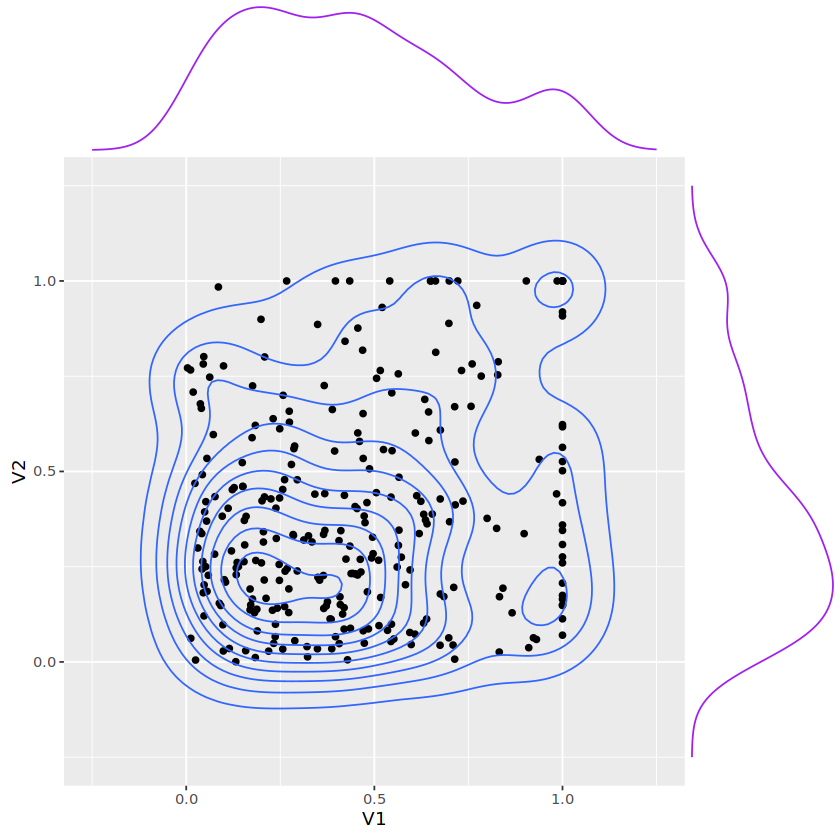

In [92]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Organ %in% c('BG') & Cell_Type=='Bulk' & AntPost=='Ant'& !(Hemisphere %in% c('L') ))
Post <- subset(filtered_brain_only, Organ %in% c('BG')& Cell_Type=='Bulk' & AntPost=='Post'& !(Hemisphere %in% c('L')))
Dor <- subset(filtered_brain_only, Organ %in% c('CTX')& Cell_Type=='Bulk' & AntPost=='Ant'& !(Hemisphere %in% c('L')))
Ven <- subset(filtered_brain_only, Organ %in% c('CTX')& Cell_Type=='Bulk' & AntPost=='Post'& !(Hemisphere %in% c('L')))

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [36]:
# 'CTX''CB''Heart''Kidney''BG''AMG''HIP''THAL''SUB''Liver''CLO''JGG'
brain_mosaic_filtered <- subset(mosaic_filtered, Organ %in% c('CTX','POA') & !(Organ %in% c('THAL','HEART','ADRENAL','LIVER','SKIN','JGG','BG','OLF','CB','HIP')) 
                              # & !(Hemisphere %in% c('L'))
                               )
length(unique(brain_mosaic_filtered$CHROM.POS.REF.ALT))
brain_mosaic_filtered_cutoff<- subset(brain_mosaic_filtered, LOWER_CI>0.002360687 & UPPER_CI<0.4562841)
unique(brain_mosaic_filtered_cutoff$Organ)
nrow(brain_mosaic_filtered_cutoff)
brain_only_variants<-unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT)
length(unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

[1] 743

[1] "CTX" "POA"

[1] 6338

[1] 208

[1] 0.0007002559

[1] 0.001701321

[1] 0.001015007

[1] 0.0007265103

Warning message:
“Removed 11 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 11 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 11 rows containing missing values (`geom_point()`).”


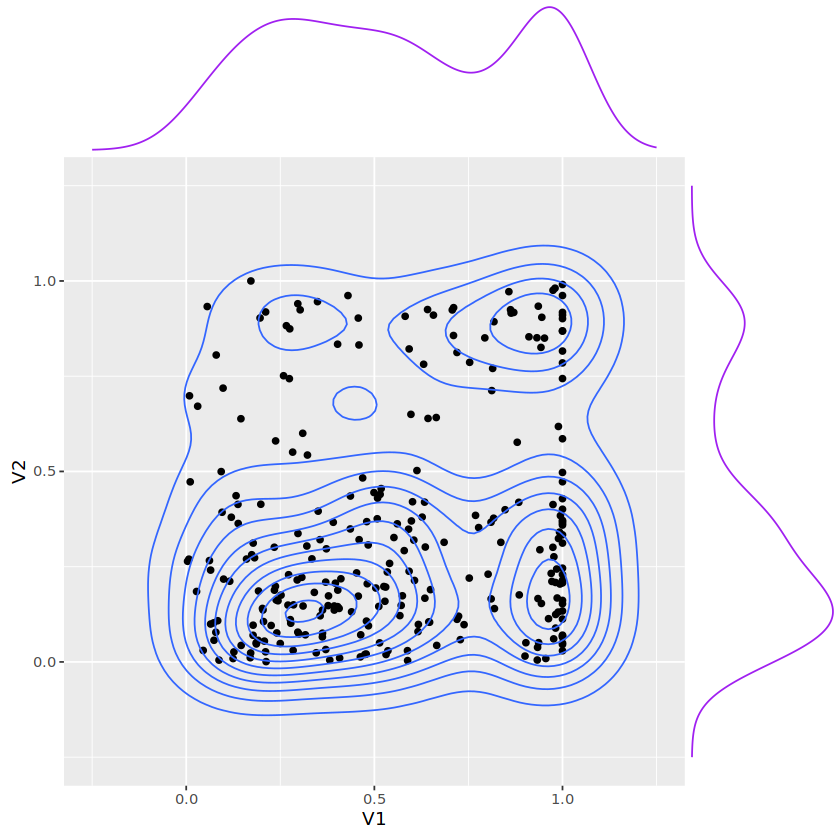

In [93]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Organ %in% c('POA') & Hemisphere=='L'& Cell_Type=='Bulk')
Post <- subset(filtered_brain_only, Organ %in% c('POA')& Hemisphere=='R'& Cell_Type=='Bulk')
Dor <- subset(filtered_brain_only, Organ %in% c('CTX')& Hemisphere=='L'& Cell_Type=='Bulk')
Ven <- subset(filtered_brain_only, Organ %in% c('CTX')& Hemisphere=='R'& Cell_Type=='Bulk')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [38]:
# 'CTX''CB''Heart''Kidney''BG''AMG''HIP''THAL''SUB''Liver''CLO''JGG'
brain_mosaic_filtered <- subset(mosaic_filtered, Organ %in% c('CTX','BG') & !(Organ %in% c('THAL','HEART','ADRENAL','LIVER','SKIN','JGG','POA','OLF','CB','HIP')) 
                              # & !(Hemisphere %in% c('L'))
                               )
length(unique(brain_mosaic_filtered$CHROM.POS.REF.ALT))
brain_mosaic_filtered_cutoff<- subset(brain_mosaic_filtered, LOWER_CI>0.002360687 & UPPER_CI<0.4562841)
unique(brain_mosaic_filtered_cutoff$Organ)
nrow(brain_mosaic_filtered_cutoff)
brain_only_variants<-unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT)
length(unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

[1] 743

[1] "CTX" "BG"

[1] 7037

[1] 200

[1] 0.001103804

[1] 0.0006979183

[1] 0.001015007

[1] 0.0007265103

Warning message:
“Removed 3 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 3 rows containing non-finite values (`stat_density2d()`).”
Warning message:
“Removed 3 rows containing missing values (`geom_point()`).”


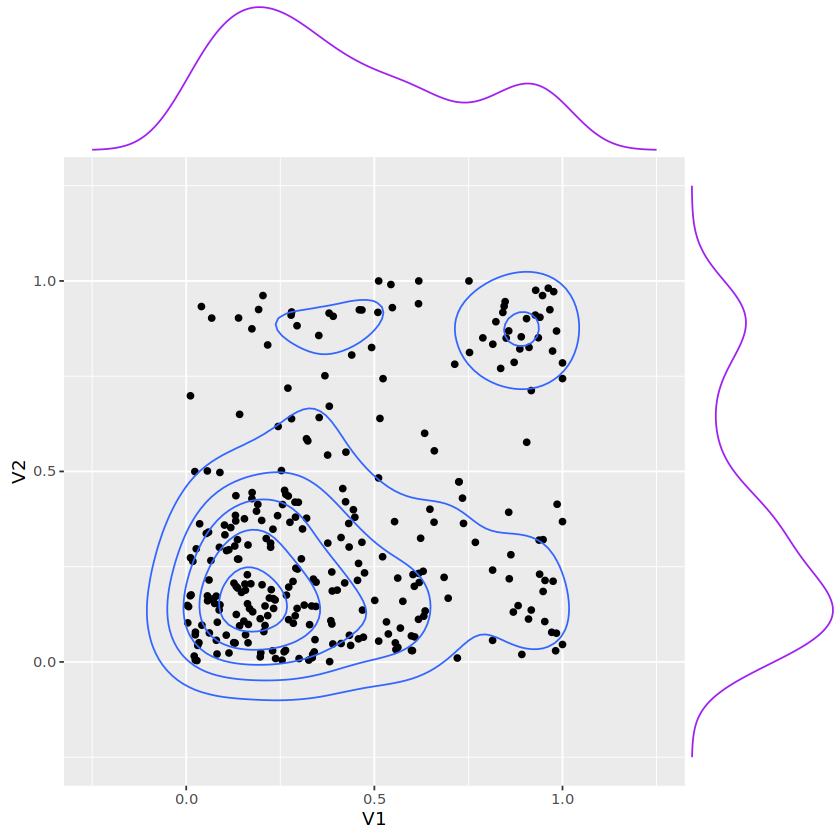

In [94]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Organ %in% c('BG') & Hemisphere=='L'& Cell_Type=='Bulk')
Post <- subset(filtered_brain_only, Organ %in% c('BG')& Hemisphere=='R'& Cell_Type=='Bulk')
Dor <- subset(filtered_brain_only, Organ %in% c('CTX')& Hemisphere=='L'& Cell_Type=='Bulk')
Ven <- subset(filtered_brain_only, Organ %in% c('CTX')& Hemisphere=='R'& Cell_Type=='Bulk')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-abs(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-0.25,1.25)+ylim(-0.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)

In [95]:
# 'CTX''CB''Heart''Kidney''BG''AMG''HIP''THAL''SUB''Liver''CLO''JGG'
brain_mosaic_filtered <- subset(mosaic_filtered, Organ %in% c('CTX') & !(Organ %in% c('THAL','BG','HEART','ADRENAL','LIVER','SKIN','JGG','POA','OLF','CB','HIP')) 
                               & !(Hemisphere %in% c('L'))
                               )
length(unique(brain_mosaic_filtered$CHROM.POS.REF.ALT))
brain_mosaic_filtered_cutoff<- subset(brain_mosaic_filtered, LOWER_CI>0.002360687 & UPPER_CI<0.4562841)
unique(brain_mosaic_filtered_cutoff$Organ)
nrow(brain_mosaic_filtered_cutoff)
brain_only_variants<-unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT)
length(unique(brain_mosaic_filtered_cutoff$CHROM.POS.REF.ALT))

[1] 743

[1] "CTX"

[1] 4336

[1] 130

[1] 0.01600847

[1] 0.01778428

[1] 0.01600847

[1] 0.01829228

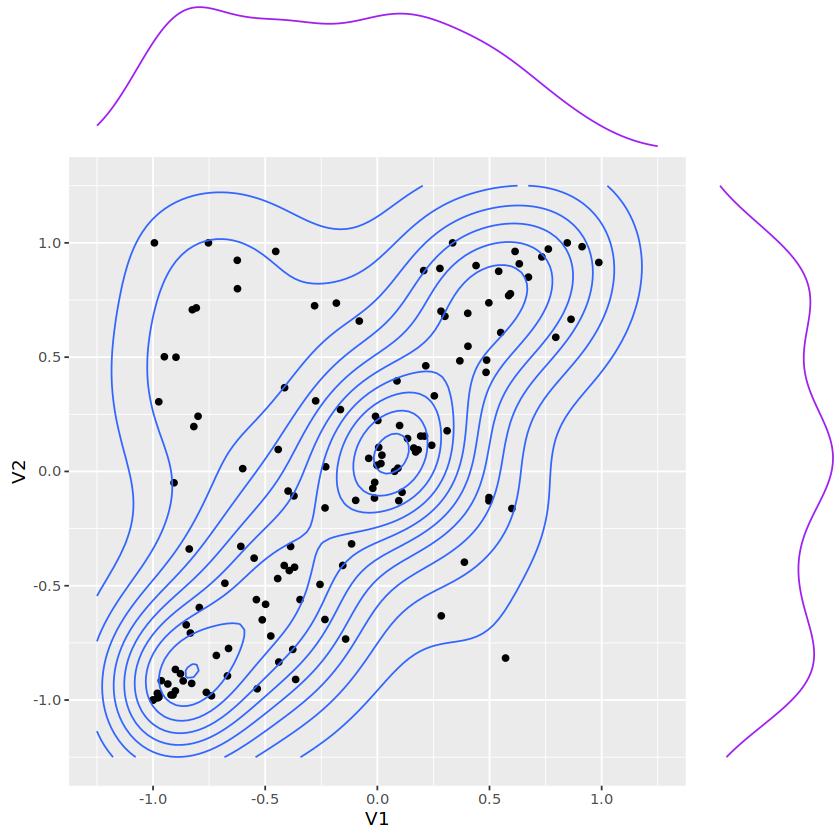

In [100]:
filtered_brain_only<-subset(filtered, CHROM.POS.REF.ALT %in% brain_only_variants)

Ant <- subset(filtered_brain_only, Region %in% c('I') & Hemisphere=='R'& Cell_Type=='TBR1')
Post <- subset(filtered_brain_only, Region %in% c('P')& Hemisphere=='R'& Cell_Type=='TBR1')
Dor <- subset(filtered_brain_only, Region %in% c('I')& Hemisphere=='R'& Cell_Type=='TBR1')
Ven <- subset(filtered_brain_only, Region %in% c('T')& Hemisphere=='R'& Cell_Type=='TBR1')

sum(Ant$MAF, na.rm = TRUE)/length(Ant$MAF)
sum(Post$MAF, na.rm = TRUE)/length(Post$MAF)
sum(Dor$MAF, na.rm = TRUE)/length(Dor$MAF)
sum(Ven$MAF, na.rm = TRUE)/length(Ven$MAF)

delta<-data.frame()
for (i in 1:length(brain_only_variants)){
    xx<-subset(Ant, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Post, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,1]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

for (i in 1:length(brain_only_variants)){
    xx<-subset(Dor, CHROM.POS.REF.ALT==brain_only_variants[i])
    yy<-subset(Ven, CHROM.POS.REF.ALT==brain_only_variants[i])
    avg_xx<-mean(xx$MAF, na.rm=TRUE) 
    avg_yy<-mean(yy$MAF, na.rm=TRUE)
    avg_xx
    avg_yy
    delta[i,2]<-(avg_xx-avg_yy)/max(avg_xx,avg_yy)
    }

p<-ggplot(delta, aes(x=V1, y=V2)) + geom_point()+xlim(-1.25,1.25)+ylim(-1.25,1.25)+geom_density_2d() 
ggMarginal(p, color="purple", size=4)